In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset
df = pd.read_excel("Autism child data.xlsx")

In [4]:
# displaying the first five rows of the dataset
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0         1         1         0   
1         1         1         0         0         1         1         0   
2         1         1         1         1         1         1         1   
3         1         0         1         1         1         1         0   
4         1         1         1         1         1         1         1   

   A8_Score  A9_Score  A10_Score  ... gender        ethnicity jundice austim  \
0         1         0          0  ...      m           Others      no     no   
1         1         0          0  ...      m  Middle Eastern       no     no   
2         1         1          1  ...      m           Others     yes     no   
3         1         0          1  ...      m   White-European      no     no   
4         1         0          0  ...      f  Middle Eastern       no     no   

    contry_of_res used_app_before result    age_desc relation Class/ASD  
0          Jordan              no      5  4-11 years   Parent        NO  
1          Jordan              no      5  4-11 years   Parent        NO  
2   United States              no     10  4-11 years   Parent       YES  
3  United Kingdom              no      7  4-11 years   Parent       YES  
4         Bahrain              no      8  4-11 years   Parent       YES  

[5 rows x 21 columns]

In [5]:
# displaying last 5 records of the dataset
df.tail()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
493         1         1         1         1         1         1         1   
494         1         0         0         0         1         0         1   
495         1         0         1         1         1         1         1   
496         1         1         1         0         1         1         1   
497         0         0         1         0         1         0         1   

     A8_Score  A9_Score  A10_Score  ... gender       ethnicity jundice austim  \
493         1         1          1  ...      f  White-European     yes    yes   
494         0         0          1  ...      f  White-European     yes    yes   
495         0         0          1  ...      m          Latino      no     no   
496         1         1          1  ...      m     South Asian      no     no   
497         0         0          0  ...      f     South Asian      no     no   

      contry_of_res used_app_before result    age_desc relation Class/ASD  
493  United Kingdom              no     10  4-11 years   Parent       YES  
494       Australia              no      4  4-11 years   Parent        NO  
495          Brazil              no      7  4-11 years   Parent       YES  
496           India              no      9  4-11 years   Parent       YES  
497           India              no      3  4-11 years   Parent        NO  

[5 rows x 21 columns]

In [6]:
df = df[df['age']!='?']

In [7]:
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])
df['ethnicity']= le.fit_transform(df['ethnicity'])
df['jundice']= le.fit_transform(df['jundice'])
df['austim']= le.fit_transform(df['austim'])
df['contry_of_res']= le.fit_transform(df['contry_of_res'])
df['used_app_before']= le.fit_transform(df['used_app_before'])
df['age_desc']= le.fit_transform(df['age_desc'])
df['relation']= le.fit_transform(df['relation'])
df['Class/ASD']= le.fit_transform(df['Class/ASD'])

In [8]:
# Let's check the shape of the dataset
df.shape

(496, 21)

In [9]:
# getting the columns of the dataset
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [10]:
# checking of null values
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [11]:
#total missing data
train_total = df.isnull().sum()
train_percent= ((df.isnull().sum()/df.shape[0])*100)

data_missing= pd.DataFrame({'train total':train_total, 'train percent': train_percent})
data_missing.sort_values(by='train total', ascending=False).head()

train total  train percent
A1_Score            0            0.0
gender              0            0.0
relation            0            0.0
age_desc            0            0.0
result              0            0.0

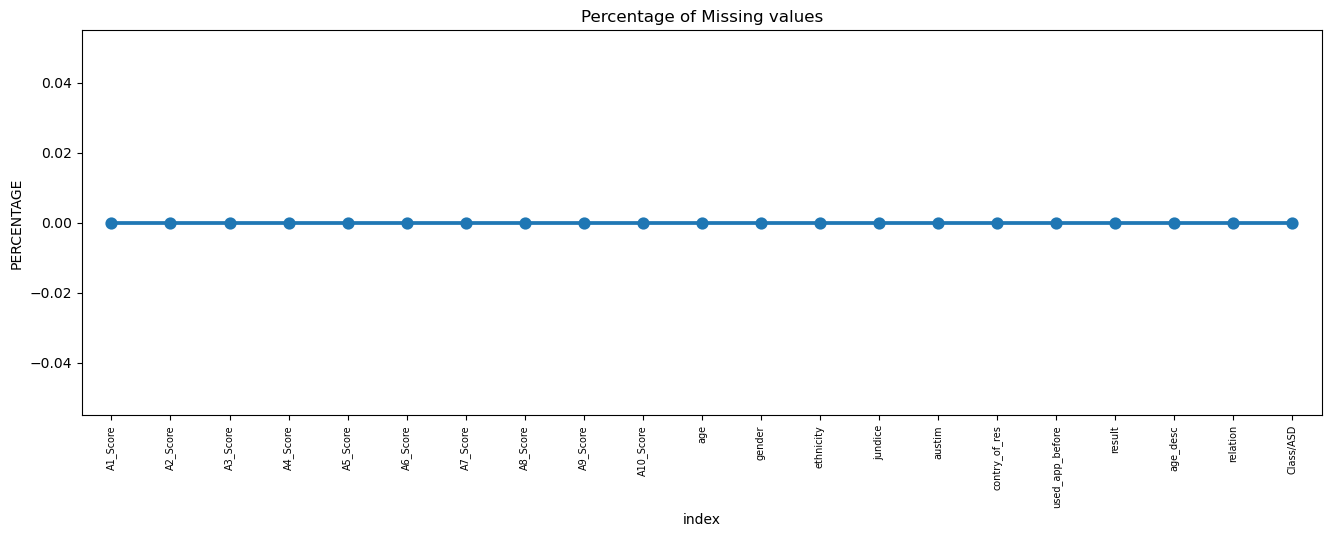

In [12]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

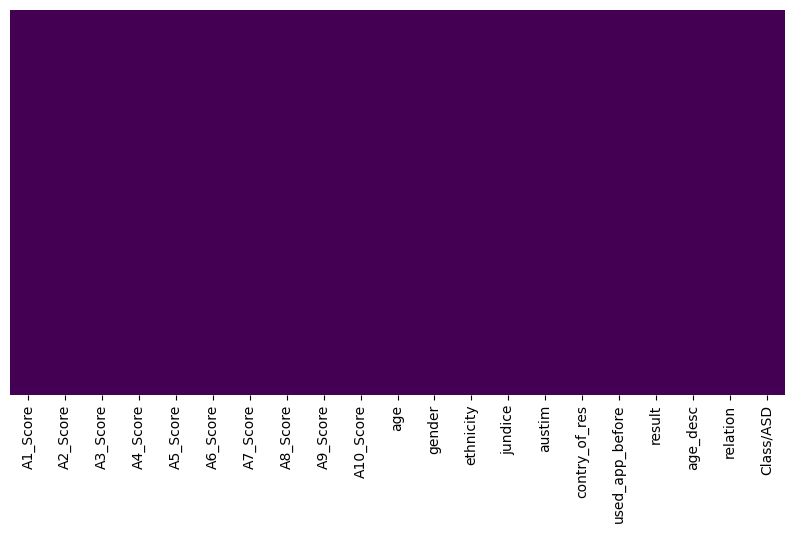

In [13]:
# plot the line plot to show the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [14]:
# checking the datatypes of the columns
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender              int32
ethnicity           int32
jundice             int32
austim              int32
contry_of_res       int32
used_app_before     int32
result              int64
age_desc            int32
relation            int32
Class/ASD           int32
dtype: object

In [15]:
df['age'] = df['age'].astype(object).astype(int)

In [16]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 497
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   A1_Score         496 non-null    int64
 1   A2_Score         496 non-null    int64
 2   A3_Score         496 non-null    int64
 3   A4_Score         496 non-null    int64
 4   A5_Score         496 non-null    int64
 5   A6_Score         496 non-null    int64
 6   A7_Score         496 non-null    int64
 7   A8_Score         496 non-null    int64
 8   A9_Score         496 non-null    int64
 9   A10_Score        496 non-null    int64
 10  age              496 non-null    int32
 11  gender           496 non-null    int32
 12  ethnicity        496 non-null    int32
 13  jundice          496 non-null    int32
 14  austim           496 non-null    int32
 15  contry_of_res    496 non-null    int32
 16  used_app_before  496 non-null    int32
 17  result           496 non-null    int64
 18  age_desc       

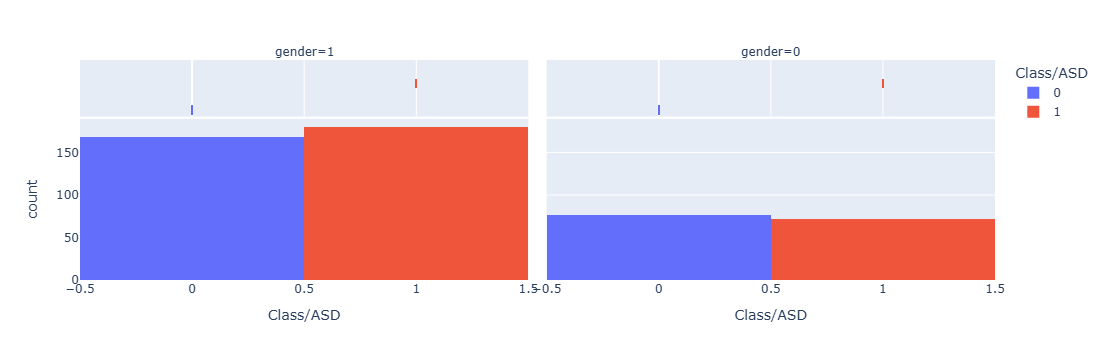

In [17]:
import plotly.express as px
px.histogram(df,'Class/ASD',facet_col='gender', color='Class/ASD', marginal='rug')

In [18]:
# statistical summary of the dataset
df.describe().T

count       mean        std  min   25%   50%   75%   max
A1_Score         496.0   0.685484   0.464792  0.0   0.0   1.0   1.0   1.0
A2_Score         496.0   0.516129   0.500244  0.0   0.0   1.0   1.0   1.0
A3_Score         496.0   0.745968   0.435755  0.0   0.0   1.0   1.0   1.0
A4_Score         496.0   0.572581   0.495203  0.0   0.0   1.0   1.0   1.0
A5_Score         496.0   0.754032   0.431094  0.0   1.0   1.0   1.0   1.0
A6_Score         496.0   0.713710   0.452483  0.0   0.0   1.0   1.0   1.0
A7_Score         496.0   0.625000   0.484612  0.0   0.0   1.0   1.0   1.0
A8_Score         496.0   0.479839   0.500098  0.0   0.0   0.0   1.0   1.0
A9_Score         496.0   0.544355   0.502568  0.0   0.0   1.0   1.0   2.0
A10_Score        496.0   0.733871   0.442379  0.0   0.0   1.0   1.0   1.0
age              496.0   6.427419   2.384032  4.0   4.0   6.0   8.0  11.0
gender           496.0   0.701613   0.458012  0.0   0.0   1.0   1.0   1.0
ethnicity        496.0   5.536290   3.626877  0.0   2.0   7.0   9.0   9.0
jundice          496.0   0.245968   0.431094  0.0   0.0   0.0   0.0   1.0
austim           496.0   0.181452   0.385781  0.0   0.0   0.0   0.0   1.0
contry_of_res    496.0  27.620968  15.807986  0.0  17.0  30.0  44.0  45.0
used_app_before  496.0   0.024194   0.153805  0.0   0.0   0.0   0.0   1.0
result           496.0   6.366935   2.340343  0.0   5.0   7.0   8.0  10.0
age_desc         496.0   0.000000   0.000000  0.0   0.0   0.0   0.0   0.0
relation         496.0   1.060484   0.467500  0.0   1.0   1.0   1.0   4.0
Class/ASD        496.0   0.508065   0.500440  0.0   0.0   1.0   1.0   1.0

<Axes: >

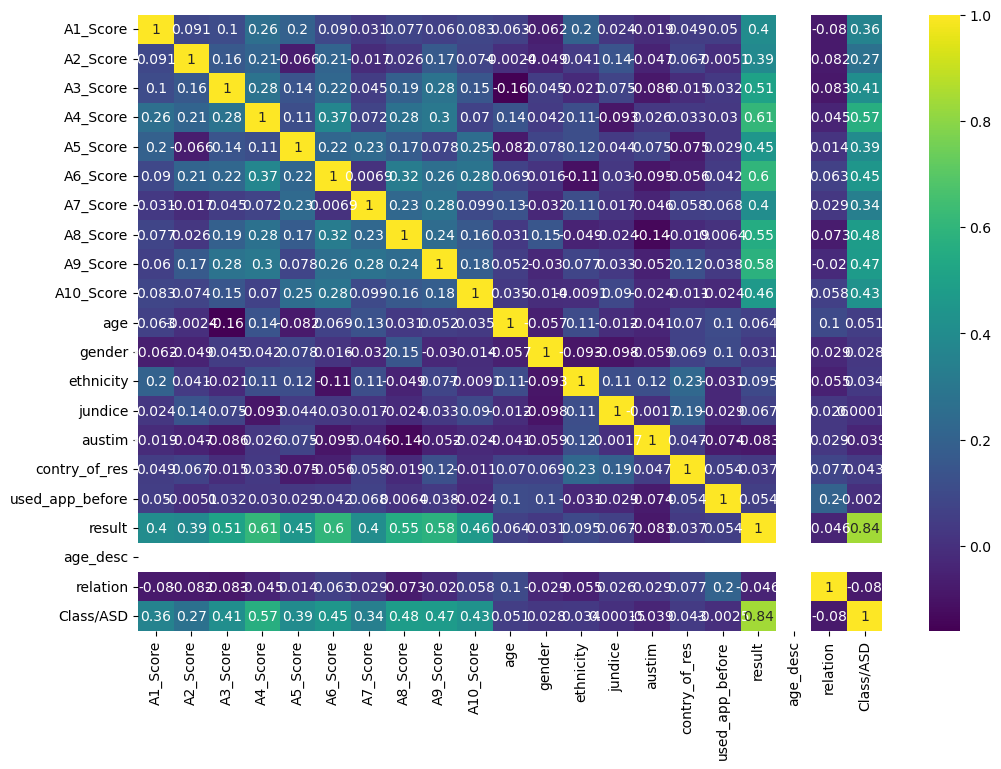

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [20]:
# checking the unique values of the dataset
df.nunique()

A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            3
A10_Score           2
age                 8
gender              2
ethnicity          10
jundice             2
austim              2
contry_of_res      46
used_app_before     2
result             11
age_desc            1
relation            5
Class/ASD           2
dtype: int64

In [21]:
# import plotly
import plotly.express as px
#Number of Unique Values
unique_values= df.select_dtypes(include='number').nunique()

fig = px.bar(unique_values, title='Number of Unique Values', labels = {'x':'', 'y':'Features'}, log_y=True)
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(showlegend=False)

In [22]:
#Check Number of Duplicates
n_duplicates = df.duplicated().sum()
print(f'We have {n_duplicates} duplicates in our dataset')

We have 249 duplicates in our dataset


<Axes: xlabel='jundice', ylabel='count'>

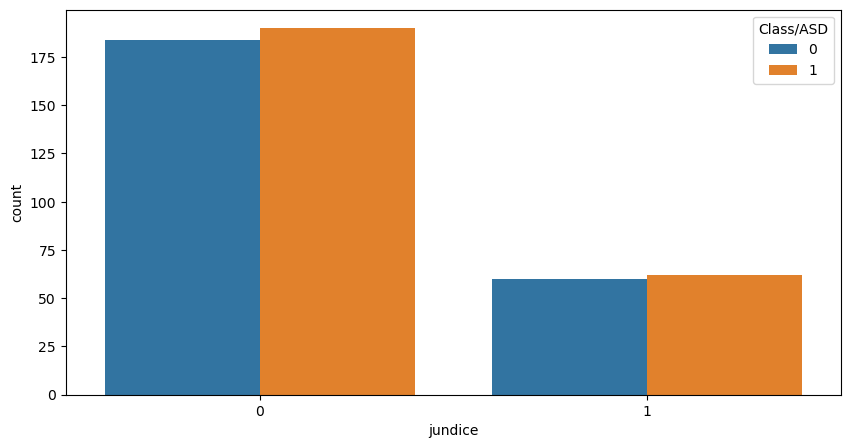

In [23]:
# plot the comparison plot for jundice and Class/ASD columns
plt.figure(figsize=(10,5))
sns.countplot(x='jundice',hue='Class/ASD',data=df)

In [24]:
#count plot for target column
df['Class/ASD'].value_counts()

Class/ASD
1    252
0    244
Name: count, dtype: int64

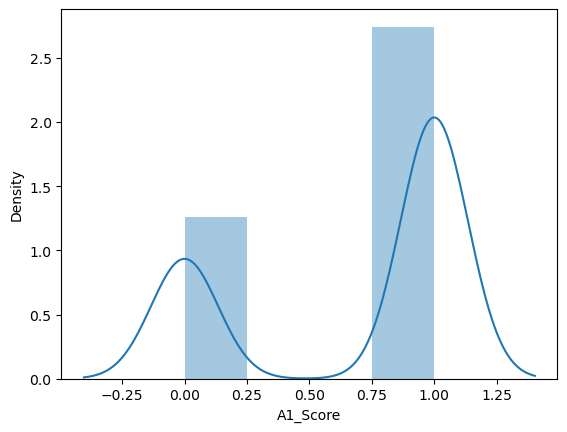

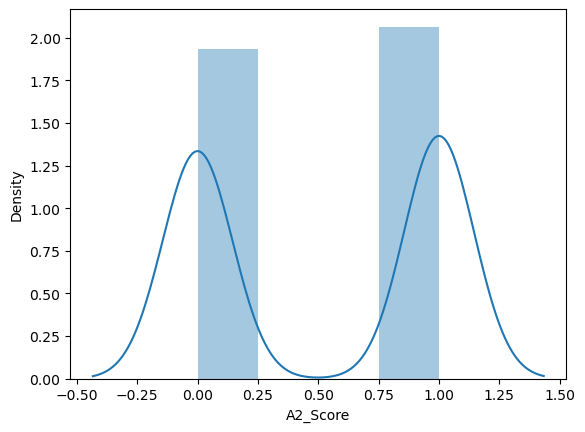

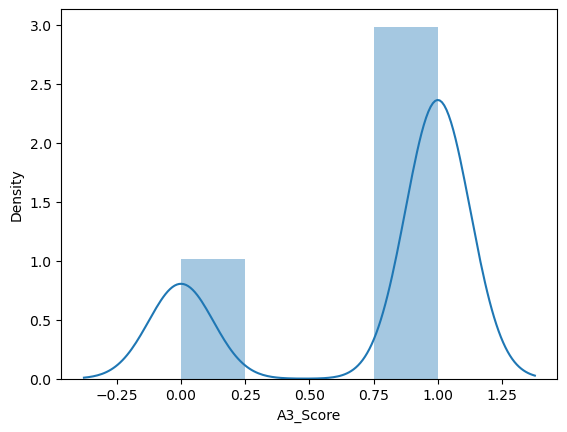

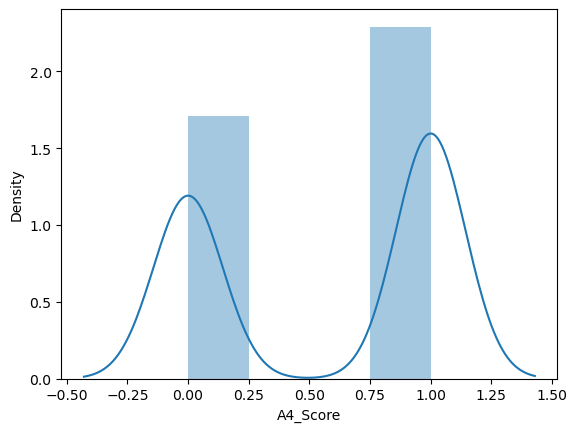

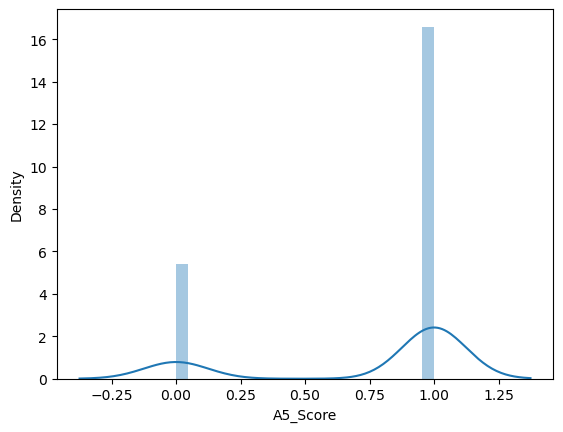

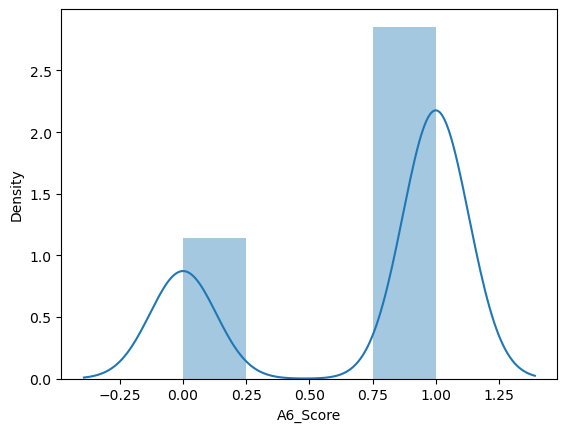

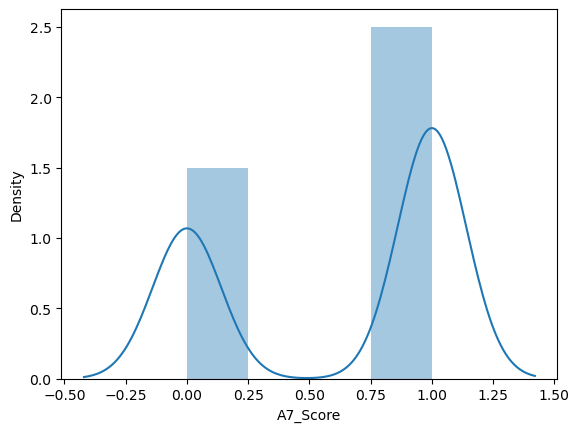

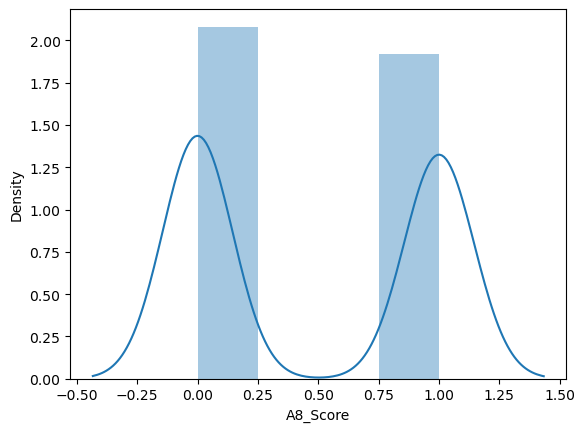

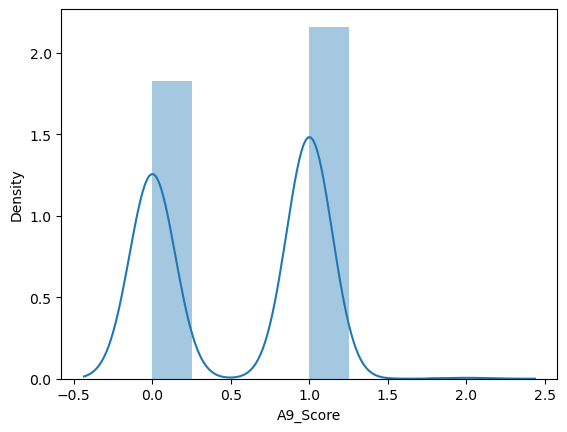

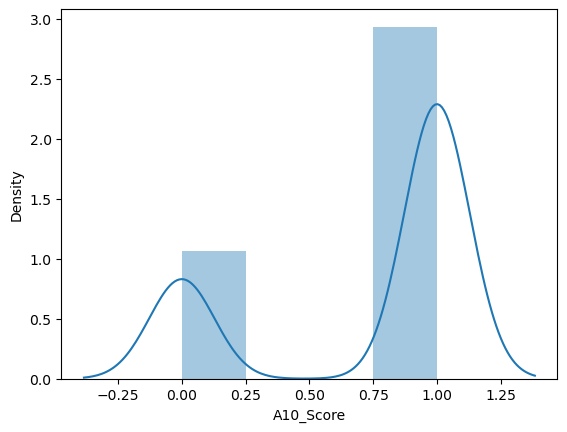

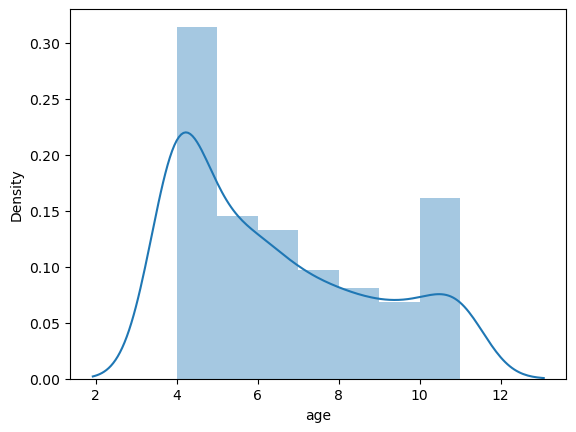

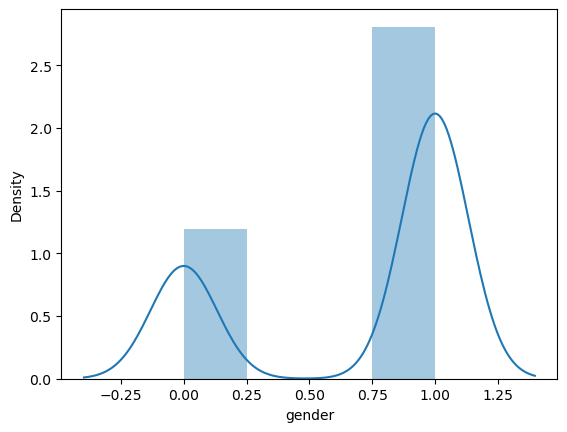

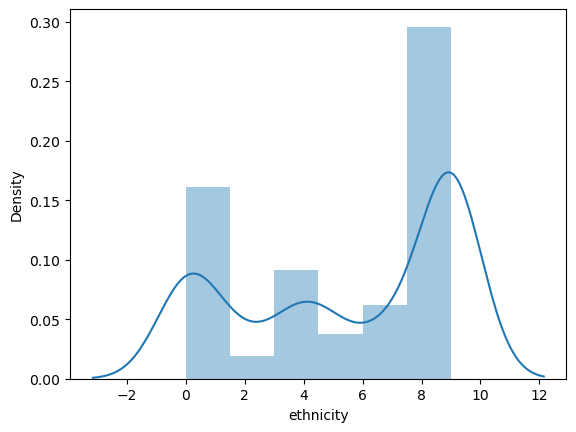

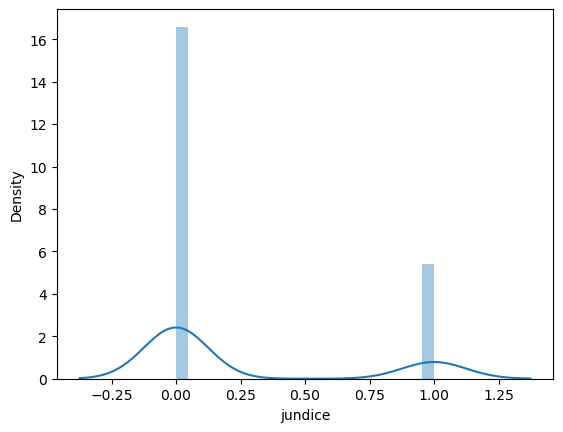

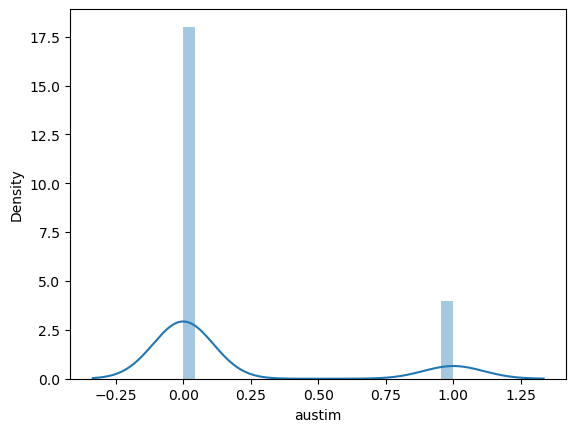

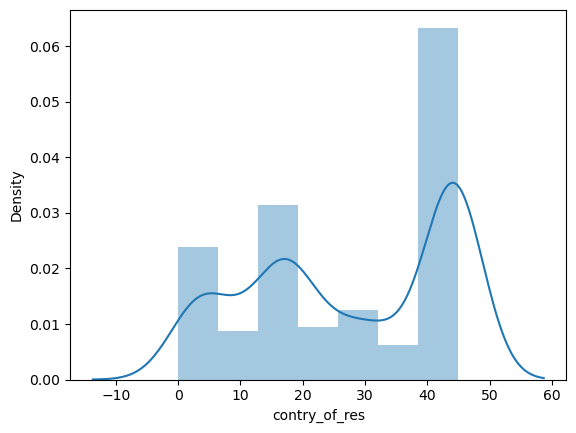

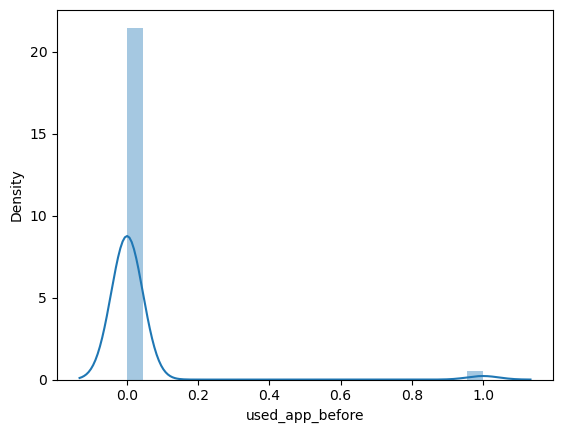

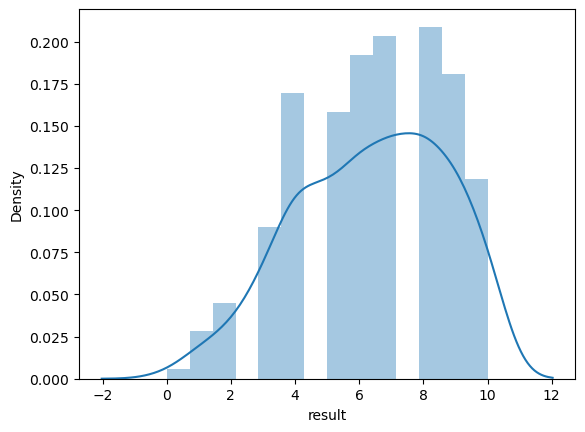

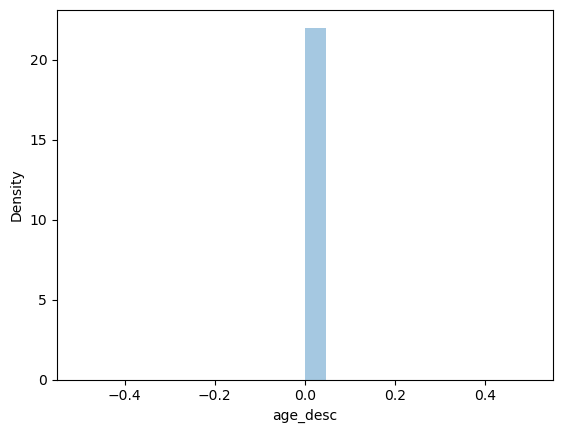

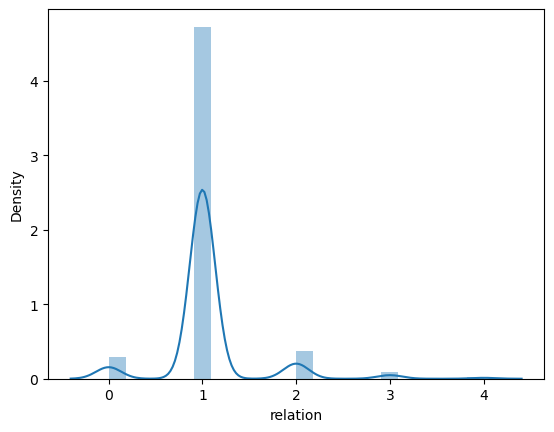

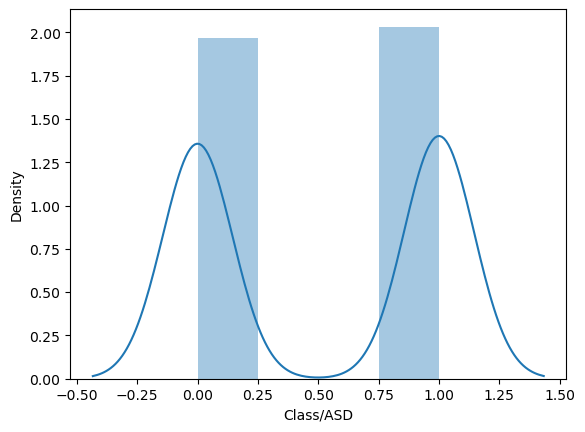

In [25]:
# write a for loop to print the density plot for each numerical column
for i in df.select_dtypes(include=np.number).columns:
    sns.distplot(df[i])
    plt.show()


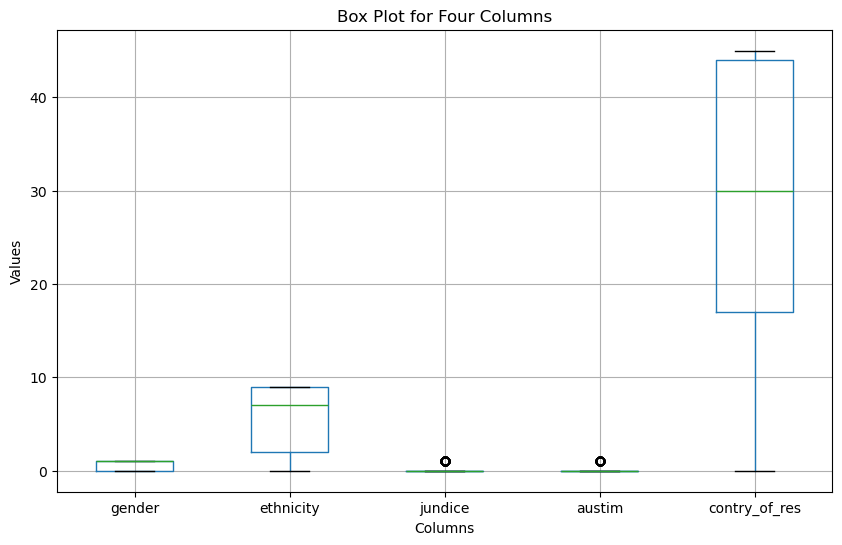

In [26]:
columns_to_plot1 = ['gender','ethnicity','jundice','austim','contry_of_res']

# Subset the DataFrame with the selected columns
subset_data = df[columns_to_plot1]

# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
subset_data.boxplot()

# Add title and labels
plt.title('Box Plot for Four Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()

<Axes: xlabel='ethnicity', ylabel='count'>

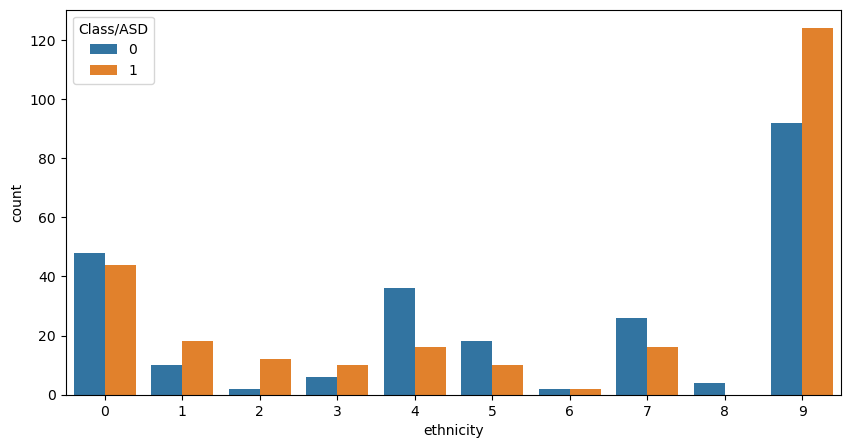

In [27]:
# plot the comparison plot for the number of ethnicity and is Class/ASD columns
plt.figure(figsize=(10,5))
sns.countplot(x='ethnicity',hue='Class/ASD',data=df)

<Axes: xlabel='age', ylabel='count'>

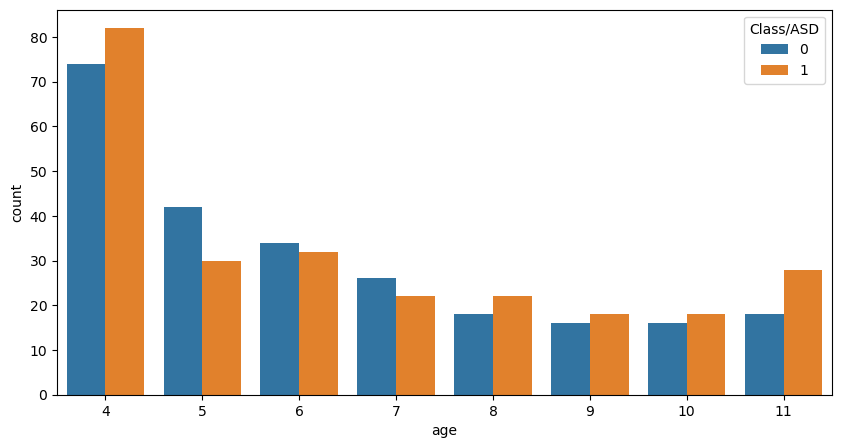

In [28]:
# plot the comparison plot for the age and is Class/ASD columns
plt.figure(figsize=(10,5))
sns.countplot(x='age',hue='Class/ASD',data=df)

<Axes: xlabel='gender', ylabel='count'>

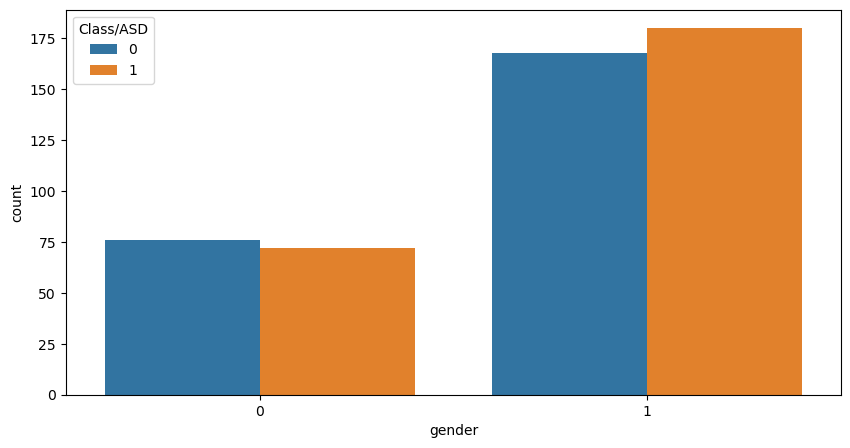

In [29]:
# plot the comparison plot for the gender and is Class/ASD columns
plt.figure(figsize=(10,5))
sns.countplot(x='gender',hue='Class/ASD',data=df)

<Axes: xlabel='contry_of_res', ylabel='count'>

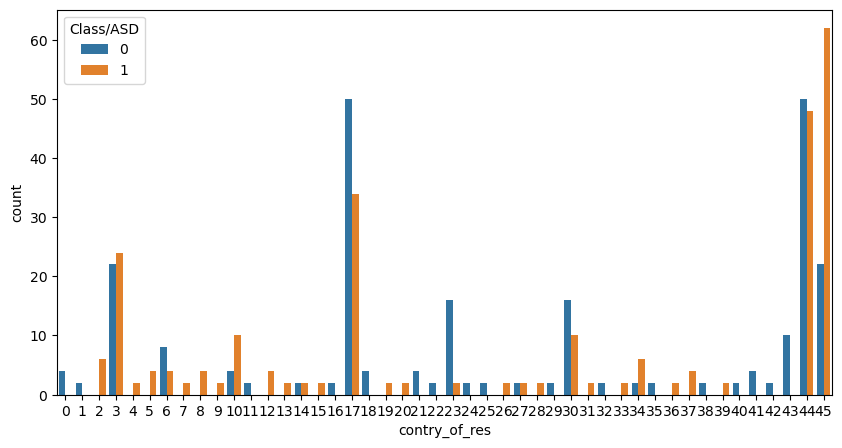

In [30]:
# comparison plot fro the length of contry_of_res and is Class/ASD columns
plt.figure(figsize=(10,5))
sns.countplot(x='contry_of_res',hue='Class/ASD',data=df)

In [31]:
# printing the high percentage of used_app_before in each length of Class/ASD
print(df.groupby('used_app_before')['Class/ASD'].value_counts(normalize=True)*100)

used_app_before  Class/ASD
0                1            50.826446
                 0            49.173554
1                0            50.000000
                 1            50.000000
Name: proportion, dtype: float64


<Axes: xlabel='used_app_before', ylabel='count'>

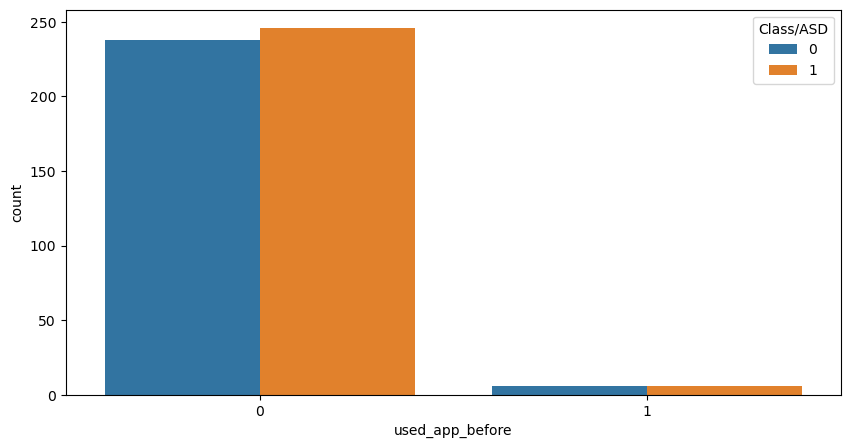

In [32]:
# comparison plot for the used_app_before and is Class/ASD columns
plt.figure(figsize=(10,5))
sns.countplot(x='used_app_before',hue='Class/ASD',data=df)

<Axes: xlabel='result', ylabel='count'>

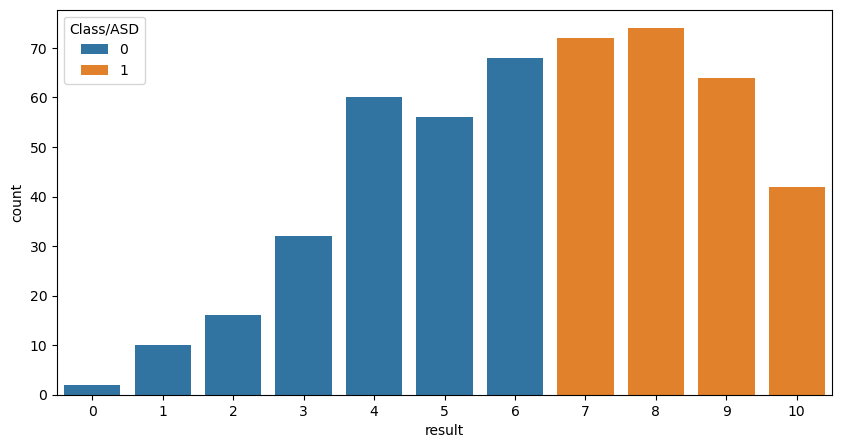

In [33]:
# comparison plot for the result and is Class/ASD columns
plt.figure(figsize=(10,5))
sns.countplot(x='result',hue='Class/ASD',data=df)

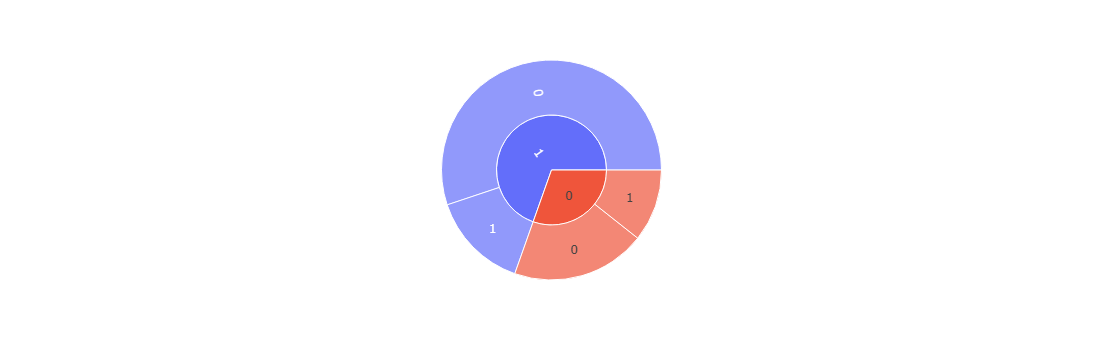

In [34]:
px.sunburst(df,path=[ 'gender','jundice'], values='relation')

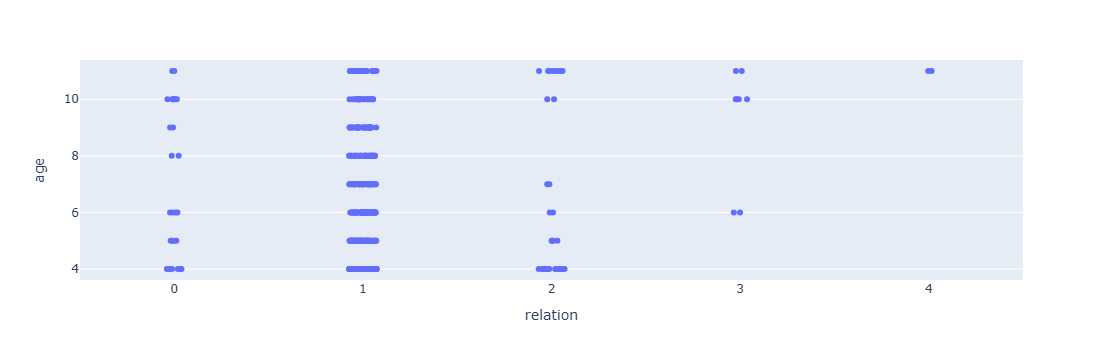

In [35]:
px.strip(df, 'relation','age')

In [36]:
# print the value counts of each column
for i in df.columns:
    print(df[i].value_counts())

A1_Score
1    340
0    156
Name: count, dtype: int64
A2_Score
1    256
0    240
Name: count, dtype: int64
A3_Score
1    370
0    126
Name: count, dtype: int64
A4_Score
1    284
0    212
Name: count, dtype: int64
A5_Score
1    374
0    122
Name: count, dtype: int64
A6_Score
1    354
0    142
Name: count, dtype: int64
A7_Score
1    310
0    186
Name: count, dtype: int64
A8_Score
0    258
1    238
Name: count, dtype: int64
A9_Score
1    268
0    227
2      1
Name: count, dtype: int64
A10_Score
1    364
0    132
Name: count, dtype: int64
age
4     156
5      72
6      66
7      48
11     46
8      40
10     34
9      34
Name: count, dtype: int64
gender
1    348
0    148
Name: count, dtype: int64
ethnicity
9    216
0     92
4     52
7     42
5     28
1     28
3     16
2     14
6      4
8      4
Name: count, dtype: int64
jundice
0    374
1    122
Name: count, dtype: int64
austim
0    406
1     90
Name: count, dtype: int64
contry_of_res
44    98
17    84
45    84
3     46
30    26
23    18
10

array([[<Axes: title={'center': 'A1_Score'}>,
        <Axes: title={'center': 'A2_Score'}>,
        <Axes: title={'center': 'A3_Score'}>,
        <Axes: title={'center': 'A4_Score'}>,
        <Axes: title={'center': 'A5_Score'}>],
       [<Axes: title={'center': 'A6_Score'}>,
        <Axes: title={'center': 'A7_Score'}>,
        <Axes: title={'center': 'A8_Score'}>,
        <Axes: title={'center': 'A9_Score'}>,
        <Axes: title={'center': 'A10_Score'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'ethnicity'}>,
        <Axes: title={'center': 'jundice'}>,
        <Axes: title={'center': 'austim'}>],
       [<Axes: title={'center': 'contry_of_res'}>,
        <Axes: title={'center': 'used_app_before'}>,
        <Axes: title={'center': 'result'}>,
        <Axes: title={'center': 'age_desc'}>,
        <Axes: title={'center': 'relation'}>],
       [<Axes: title={'center': 'Class/ASD'}>, <Axes: >, <Axes: >,
       

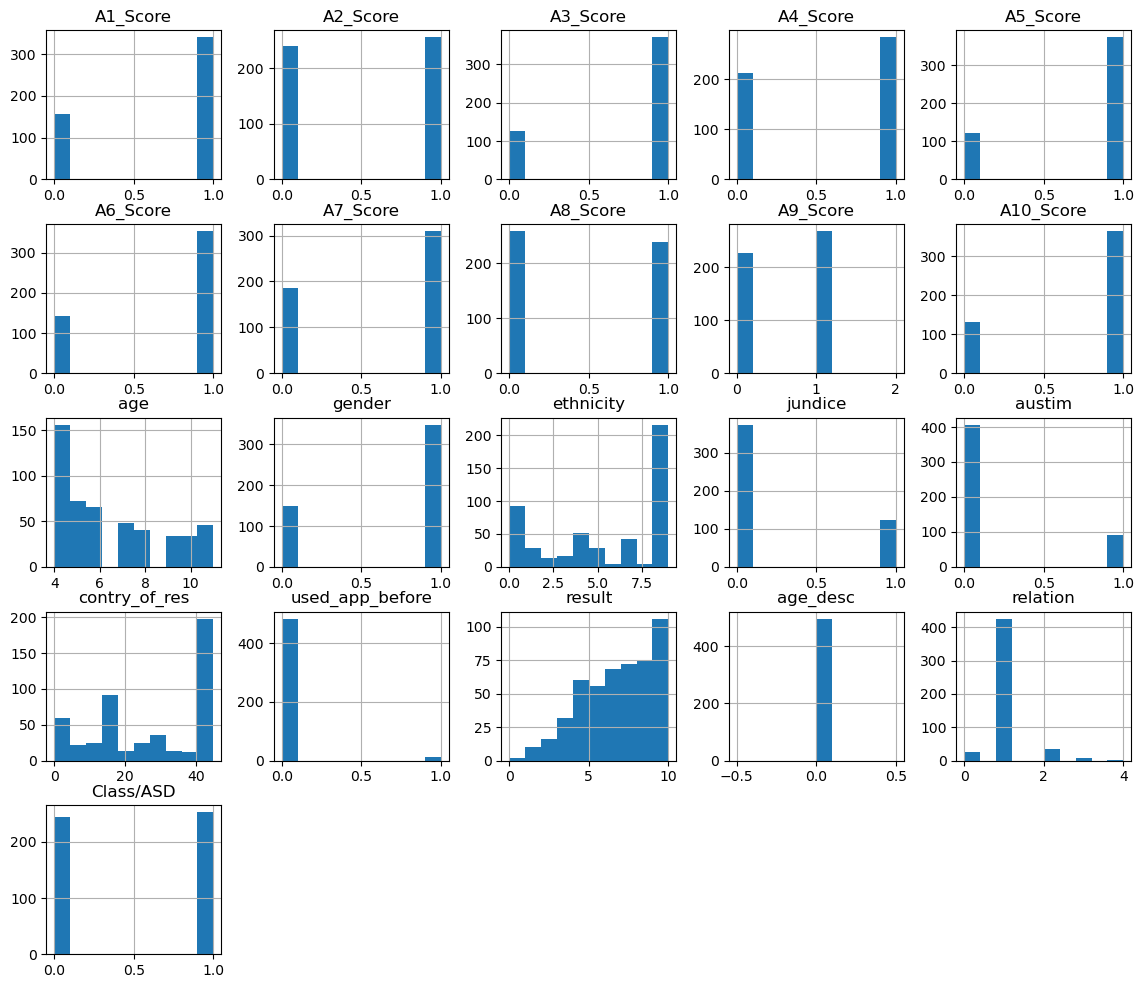

In [37]:
df.hist(figsize = (14,12))

PREPROCESSING


In [38]:
# converting the object data type to numerical data type by using the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
# now applying the label encoder to the columns with object data type
df['gender']= le.fit_transform(df['gender'])
df['ethnicity']= le.fit_transform(df['ethnicity'])
df['jundice']= le.fit_transform(df['jundice'])
df['austim']= le.fit_transform(df['austim'])
df['contry_of_res']= le.fit_transform(df['contry_of_res'])
df['used_app_before']= le.fit_transform(df['used_app_before'])
df['age_desc']= le.fit_transform(df['age_desc'])
df['relation']= le.fit_transform(df['relation'])
df['Class/ASD']= le.fit_transform(df['Class/ASD'])

In [40]:
# Now again printing the first five records of the data set to check whether there is any object data type or not
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0         1         1         0   
1         1         1         0         0         1         1         0   
2         1         1         1         1         1         1         1   
3         1         0         1         1         1         1         0   
4         1         1         1         1         1         1         1   

   A8_Score  A9_Score  A10_Score  ...  gender  ethnicity  jundice  austim  \
0         1         0          0  ...       1          5        0       0   
1         1         0          0  ...       1          4        0       0   
2         1         1          1  ...       1          5        1       0   
3         1         0          1  ...       1          9        0       0   
4         1         0          0  ...       0          4        0       0   

   contry_of_res  used_app_before  result  age_desc  relation  Class/ASD  
0             23                0       5         0         1          0  
1             23                0       5         0         1          0  
2             45                0      10         0         1          1  
3             44                0       7         0         1          1  
4              5                0       8         0         1          1  

[5 rows x 21 columns]

In [41]:
# printing the correlation matrix of the dataset
df.corr()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
A1_Score         1.000000  0.091371  0.103446  0.257368  0.197908  0.089706   
A2_Score         0.091371  1.000000  0.157849  0.207297 -0.065877  0.207867   
A3_Score         0.103446  0.157849  1.000000  0.282219  0.139892  0.224666   
A4_Score         0.257368  0.207297  0.282219  1.000000  0.112185  0.372415   
A5_Score         0.197908 -0.065877  0.139892  0.112185  1.000000  0.218242   
A6_Score         0.089706  0.207867  0.224666  0.372415  0.218242  1.000000   
A7_Score         0.031391 -0.016667  0.045441  0.071554  0.234499  0.006910   
A8_Score         0.076960  0.025528  0.189669  0.275118  0.173734  0.322620   
A9_Score         0.059842  0.165896  0.282175  0.303617  0.078432  0.260281   
A10_Score        0.083356  0.074209  0.151621  0.069907  0.249283  0.284706   
age              0.063222 -0.002404 -0.159743  0.141367 -0.082273  0.068718   
gender          -0.062143 -0.049491  0.044570  0.042237  0.077727  0.015880   
ethnicity        0.198529  0.040875 -0.020999  0.114386  0.115547 -0.110602   
jundice          0.023905  0.140820  0.075193 -0.093258  0.043570  0.030318   
austim          -0.019081 -0.046600 -0.085769  0.026096  0.074549 -0.095292   
contry_of_res    0.048631  0.067196 -0.014593  0.032941 -0.074776 -0.055872   
used_app_before  0.050138 -0.005082  0.031601  0.029947  0.028994  0.041670   
result           0.399746  0.386639  0.507585  0.606246  0.450063  0.599222   
age_desc              NaN       NaN       NaN       NaN       NaN       NaN   
relation        -0.079626 -0.081925 -0.083093 -0.045180  0.013823  0.062923   
Class/ASD        0.358339  0.273851  0.407767  0.568267  0.393145  0.447373   

                 A7_Score  A8_Score  A9_Score  A10_Score  ...    gender  \
A1_Score         0.031391  0.076960  0.059842   0.083356  ... -0.062143   
A2_Score        -0.016667  0.025528  0.165896   0.074209  ... -0.049491   
A3_Score         0.045441  0.189669  0.282175   0.151621  ...  0.044570   
A4_Score         0.071554  0.275118  0.303617   0.069907  ...  0.042237   
A5_Score         0.234499  0.173734  0.078432   0.249283  ...  0.077727   
A6_Score         0.006910  0.322620  0.260281   0.284706  ...  0.015880   
A7_Score         1.000000  0.227150  0.275802   0.098945  ... -0.031856   
A8_Score         0.227150  1.000000  0.244704   0.158330  ...  0.150080   
A9_Score         0.275802  0.244704  1.000000   0.180415  ... -0.030152   
A10_Score        0.098945  0.158330  0.180415   1.000000  ... -0.013830   
age              0.132019  0.030965  0.051590   0.035283  ... -0.056877   
gender          -0.031856  0.150080 -0.030152  -0.013830  ...  1.000000   
ethnicity        0.112353 -0.048603  0.076698  -0.009078  ... -0.093192   
jundice          0.016923 -0.023804  0.033463   0.089701  ... -0.098191   
austim          -0.045925 -0.138069 -0.052015  -0.024248  ... -0.058827   
contry_of_res    0.057884 -0.019368  0.121635  -0.010987  ...  0.069171   
used_app_before  0.067760  0.006354  0.038360  -0.023945  ...  0.102686   
result           0.403005  0.553500  0.582140   0.461353  ...  0.030732   
age_desc              NaN       NaN       NaN        NaN  ...       NaN   
relation         0.028980 -0.072542 -0.020040   0.058452  ... -0.028761   
Class/ASD        0.337368  0.476907  0.472490   0.429479  ...  0.028147   

                 ethnicity   jundice    austim  contry_of_res  \
A1_Score          0.198529  0.023905 -0.019081       0.048631   
A2_Score          0.040875  0.140820 -0.046600       0.067196   
A3_Score         -0.020999  0.075193 -0.085769      -0.014593   
A4_Score          0.114386 -0.093258  0.026096       0.032941   
A5_Score          0.115547  0.043570  0.074549      -0.074776   
A6_Score         -0.110602  0.030318 -0.095292      -0.055872   
A7_Score          0.112353  0.016923 -0.045925       0.057884   
A8_Score         -0.048603 -0.023804 -0.138069      -0.019368   
A9_Score          0.076698  0.033463 -0.05

<Axes: >

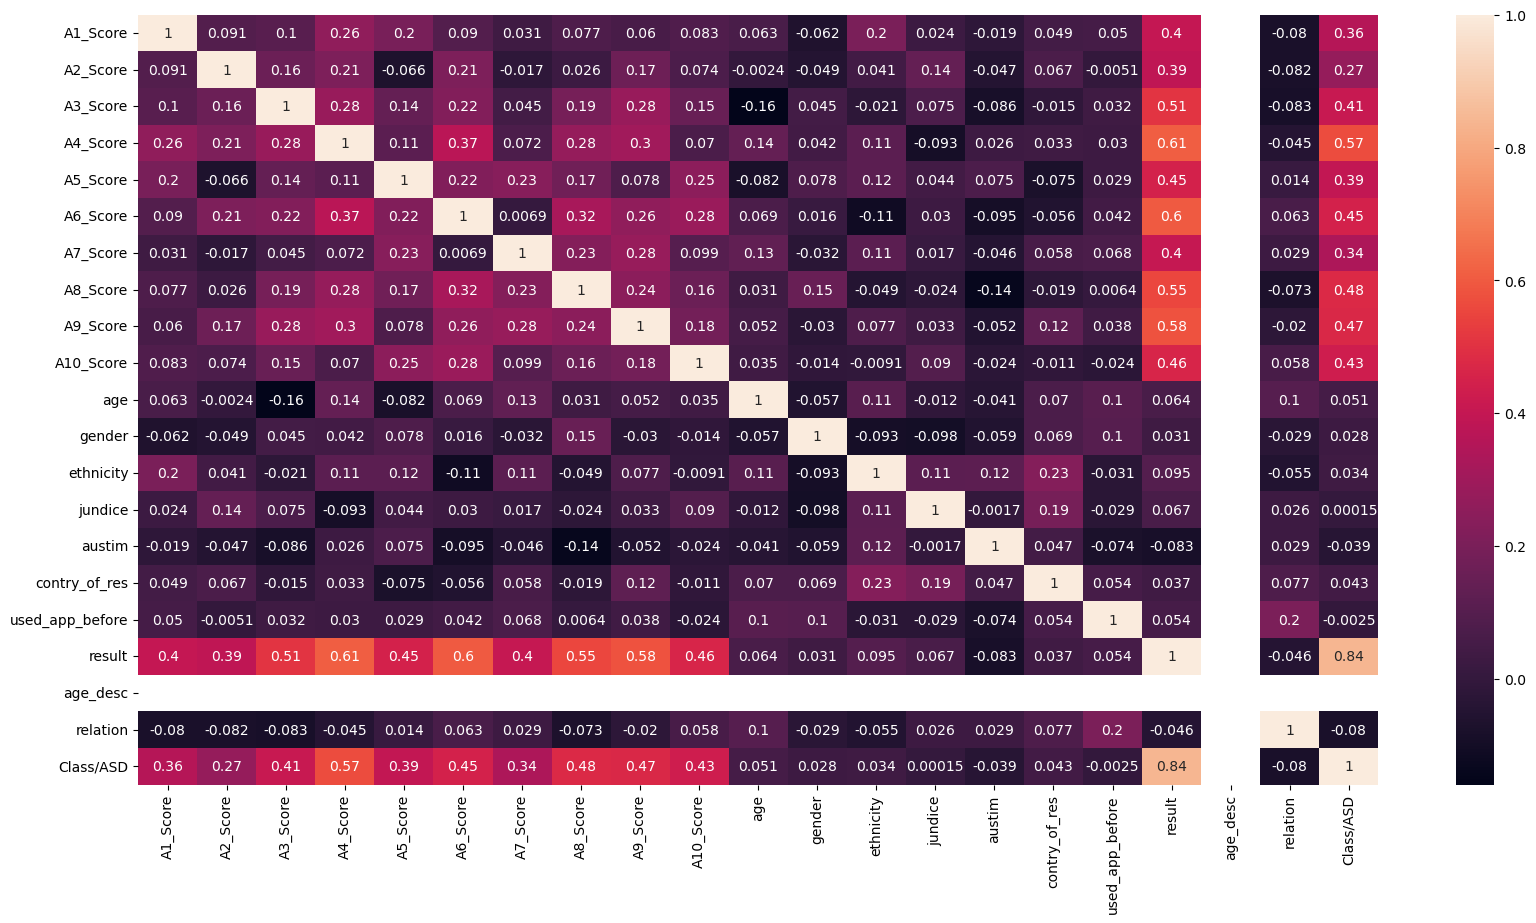

In [42]:
# plot the correlation matrix of the dataset
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

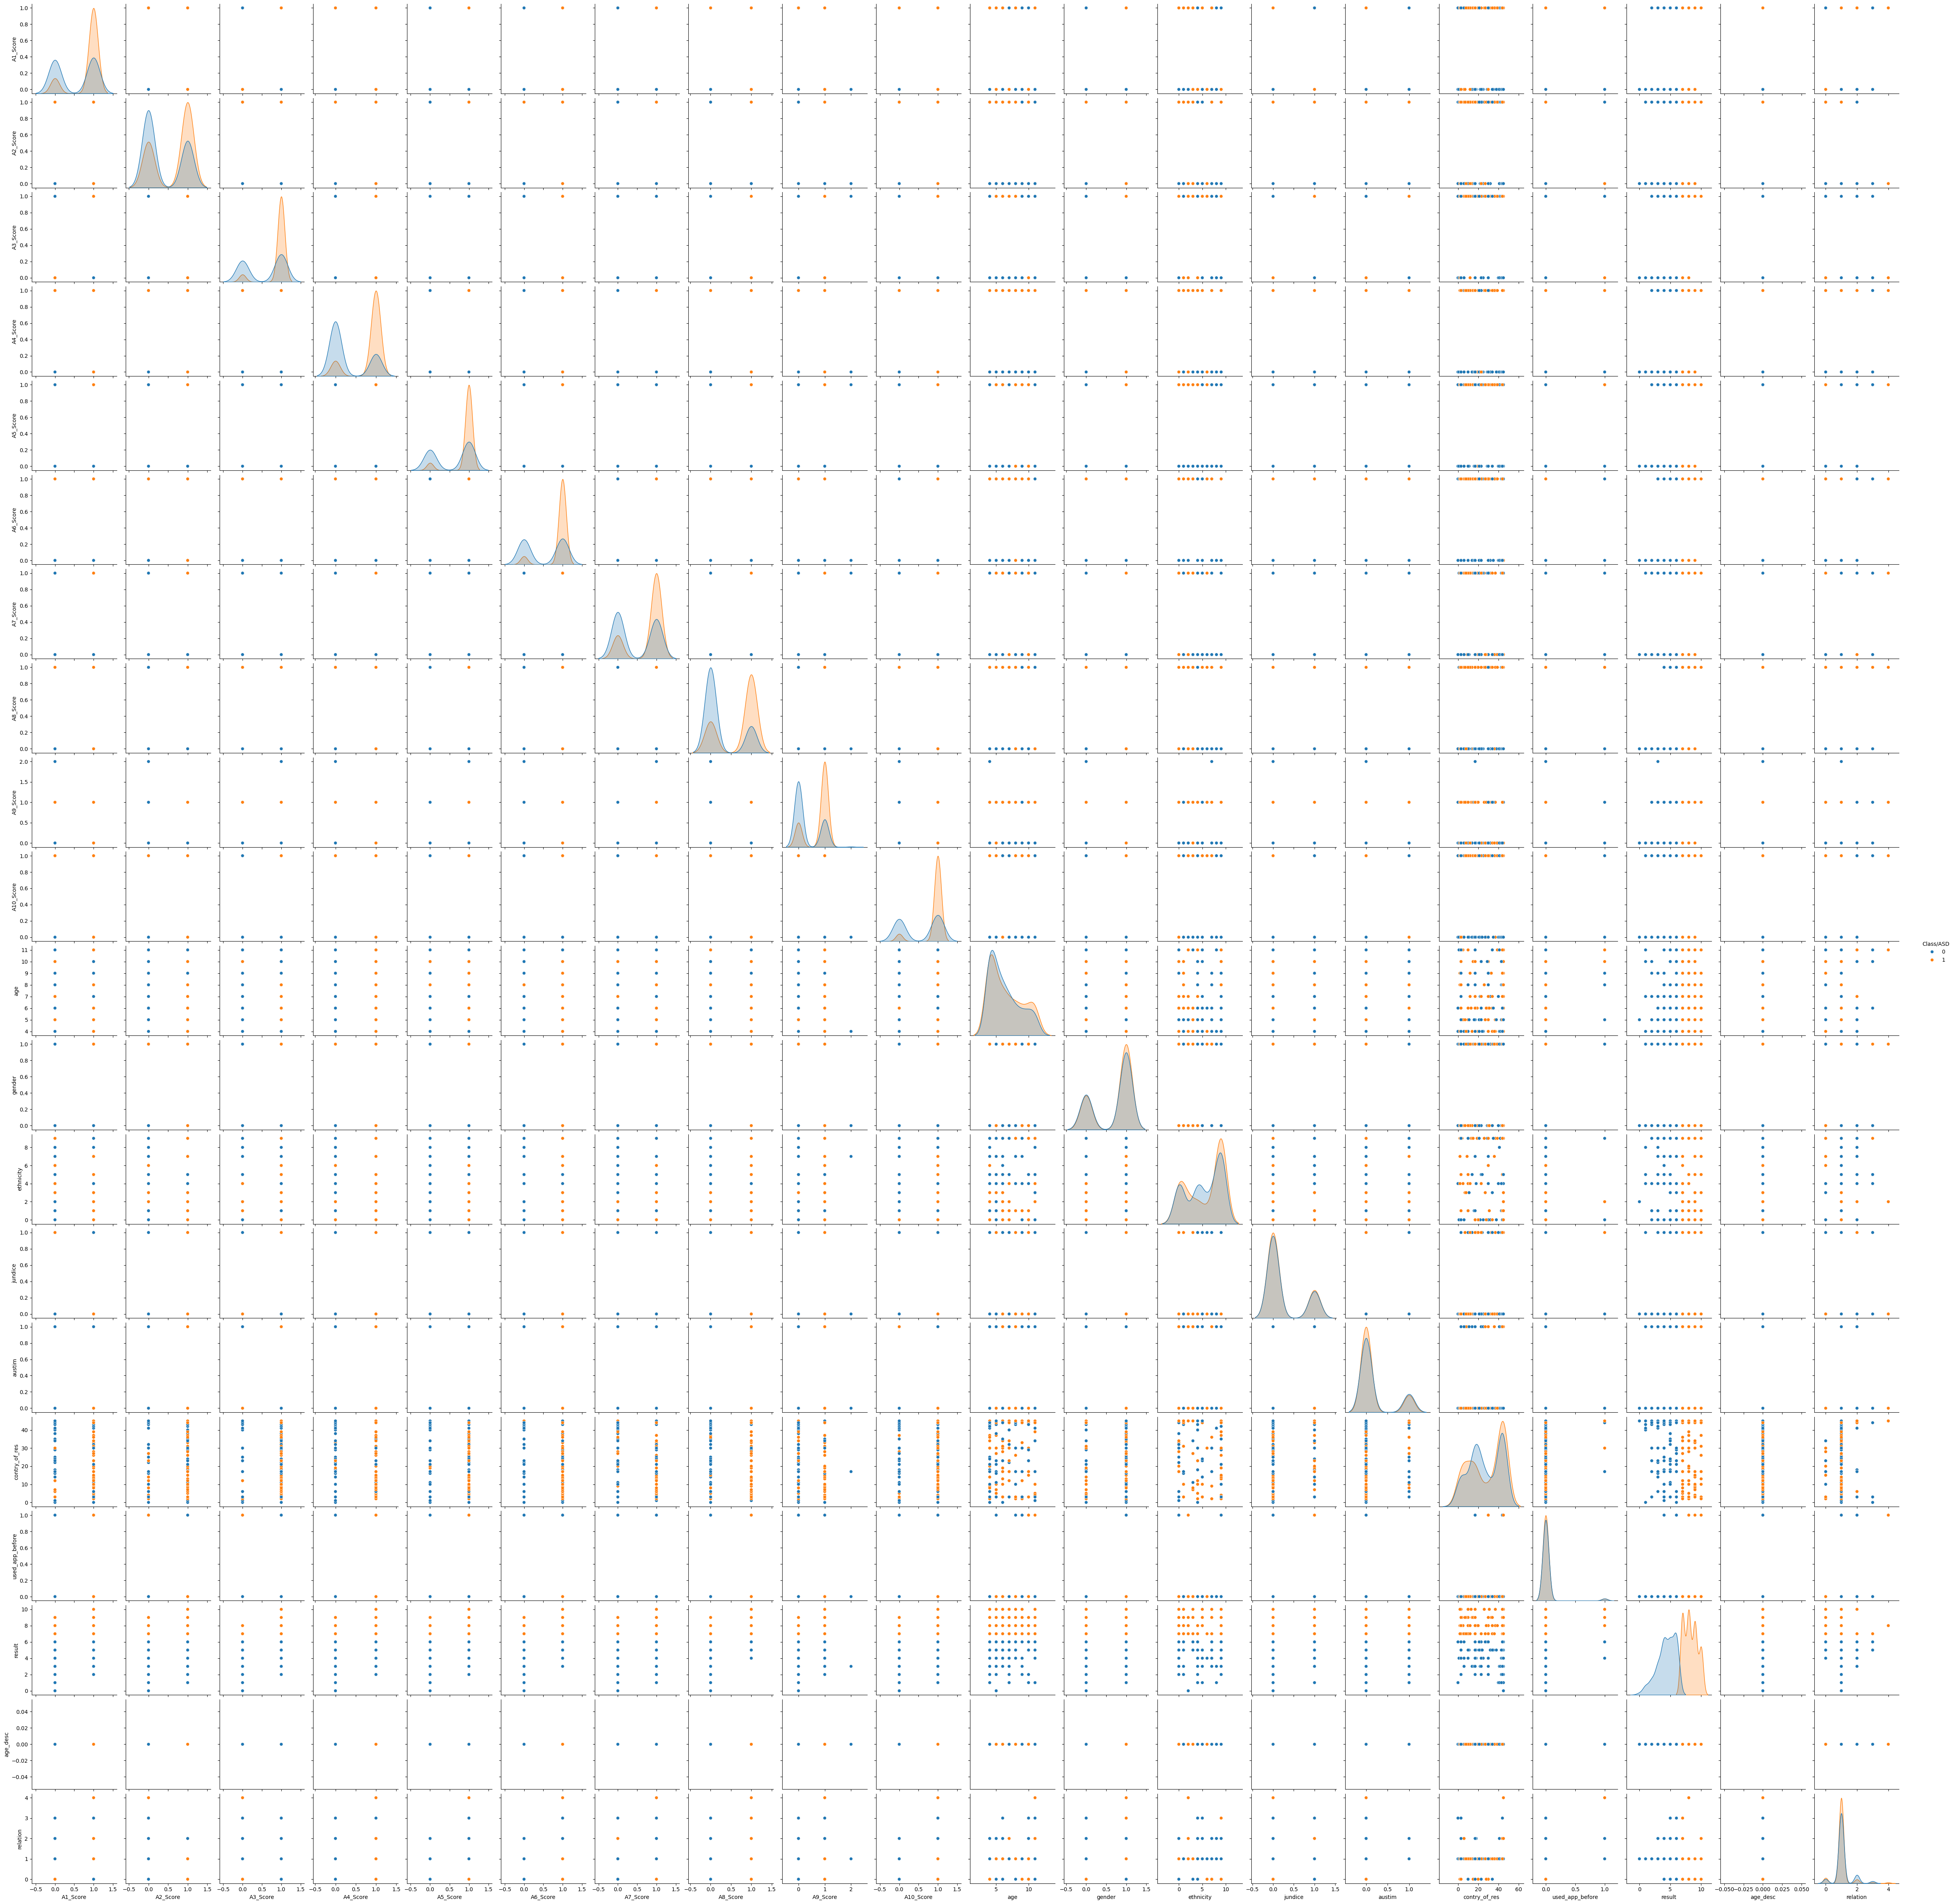

In [43]:
# plot the pair plot for the dataset
sns.pairplot(df, hue='Class/ASD')

In [44]:
# Assigning the independent and dependent variables
x = df.drop(['Class/ASD'],axis=1)
y = df['Class/ASD']

In [45]:
y.value_counts()

Class/ASD
1    252
0    244
Name: count, dtype: int64

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
# printing the shape of the training and testing data
print(f'Here is the shape of the x_train {x_train.shape}')
print(f'Here is the shape of the x_test {x_test.shape}')
print(f'Here is the shape of the y_train {y_train.shape}')
print(f'Here is the shape of the y_test {y_test.shape}')

Here is the shape of the x_train (347, 20)
Here is the shape of the x_test (149, 20)
Here is the shape of the y_train (347,)
Here is the shape of the y_test (149,)


K MEANS CLUSTERING


In [48]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.datasets import make_classification

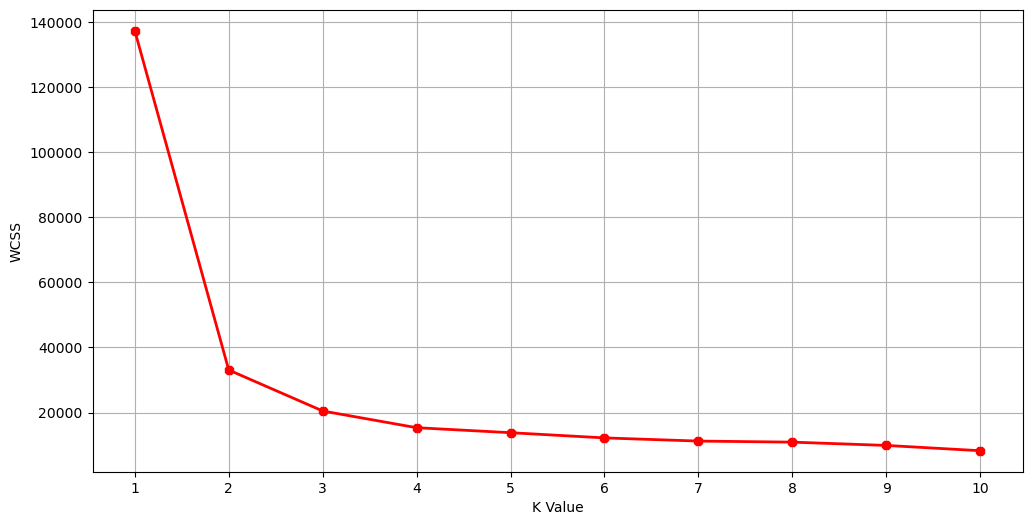

In [49]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [50]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["Class/ASD"] = clusters

In [51]:
kms = KMeans(n_clusters=5)
kms.fit(x_train)

KMeans(n_clusters=5)

In [52]:
pred = kms.predict(x_test)

In [53]:
acc_km = accuracy_score(pred,y_test)
acc_km

0.31543624161073824

In [54]:
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0         1         1         0   
1         1         1         0         0         1         1         0   
2         1         1         1         1         1         1         1   
3         1         0         1         1         1         1         0   
4         1         1         1         1         1         1         1   

   A8_Score  A9_Score  A10_Score  ...  gender  ethnicity  jundice  austim  \
0         1         0          0  ...       1          5        0       0   
1         1         0          0  ...       1          4        0       0   
2         1         1          1  ...       1          5        1       0   
3         1         0          1  ...       1          9        0       0   
4         1         0          0  ...       0          4        0       0   

   contry_of_res  used_app_before  result  age_desc  relation  Class/ASD  
0             23                0       5         0         1          2  
1             23                0       5         0         1          2  
2             45                0      10         0         1          1  
3             44                0       7         0         1          4  
4              5                0       8         0         1          3  

[5 rows x 21 columns]

In [55]:
# vlaue counts of the label column
df['Class/ASD'].value_counts()

Class/ASD
4    140
0    118
3     94
2     76
1     68
Name: count, dtype: int64

<Axes: ylabel='count'>

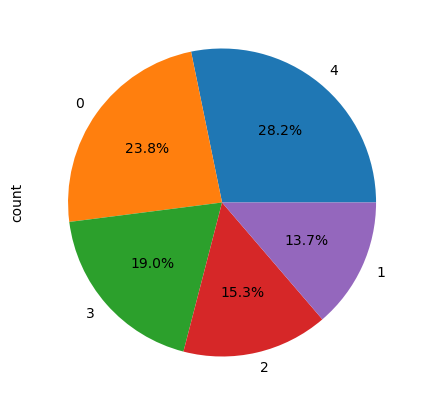

In [56]:
#  plot the pie chart for the Class/ASD column
plt.figure(figsize=(10,5))
df['Class/ASD'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Class/ASD', ylabel='count'>

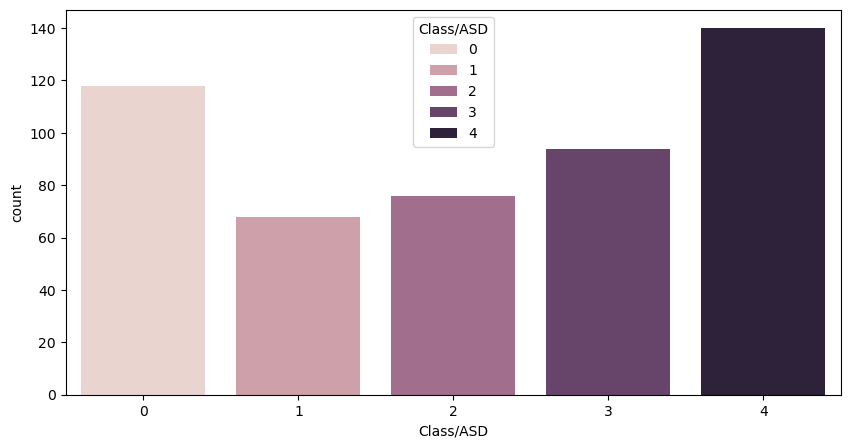

In [57]:
# plot the comparison plot is Class/ASD columns
plt.figure(figsize=(10,5))
sns.countplot(x='Class/ASD',hue='Class/ASD',data=df)

<Axes: xlabel='Class/ASD', ylabel='count'>

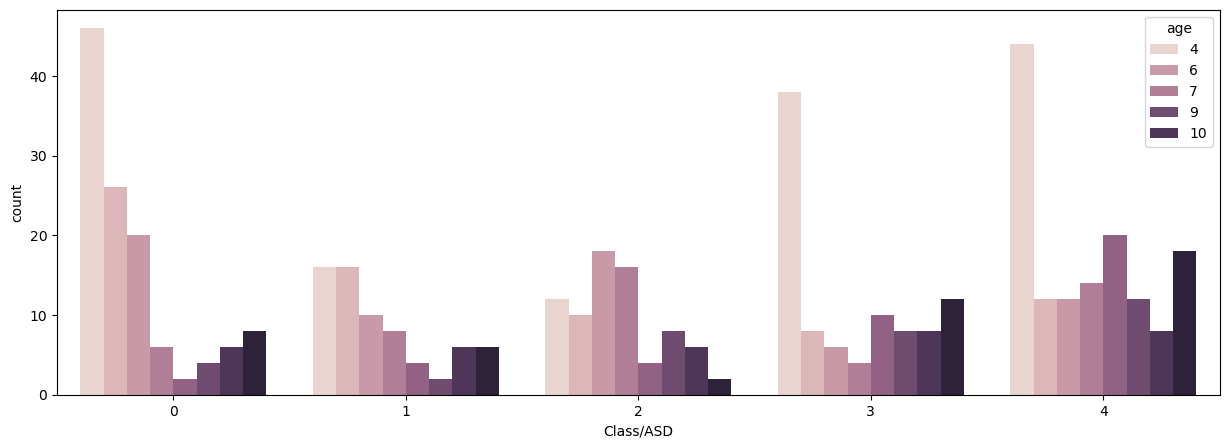

In [58]:
# plot the comparison plot for the Class/ASD column and age
plt.figure(figsize=(15,5))
sns.countplot(x='Class/ASD',hue='age',data=df)

XGB CLASSIFIER


In [59]:
x, y = make_classification(
    n_samples=1000, n_features=14, n_informative=2, n_redundant=0, n_classes=2,
    weights=[0.8, 0.2], random_state=42
)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
x_train

array([[-0.61764168, -0.88227092, -1.19678865, ...,  0.71232216,
         2.28165184, -1.88001003],
       [-0.81578773,  0.93587754, -1.54459973, ...,  0.63190034,
        -0.9044005 , -1.70734295],
       [-1.85933677, -1.0454409 ,  0.49406392, ..., -0.53804776,
         0.79784378,  0.55833642],
       ...,
       [ 0.80857101, -2.19556389, -0.55879582, ...,  0.46107803,
         0.25062823, -0.77420382],
       [-0.0862171 ,  0.73348372,  0.83016137, ..., -0.95304046,
         1.0781254 , -1.53653069],
       [-0.05739537, -0.91231877, -0.15011695, ...,  0.73918049,
         0.50702027, -0.70791094]])

In [62]:
y_train

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
!pip install xgboost

In [64]:
from xgboost import XGBClassifier 
xgb = XGBClassifier( n_estimators=100, n_jobs=None)
xgb.fit(x_train,y_train)

ypred = xgb.predict(x_test)
acc_xgb = accuracy_score(ypred,y_test)
acc_xgb

0.925

RANDOM FOREST


In [65]:
n_estimators =10
Classifier_rf = RandomForestClassifier(random_state=42,n_estimators=n_estimators)


In [66]:
Classifier_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [67]:
y_pred = Classifier_rf.predict(x_test)
acc_rf = accuracy_score(y_pred,y_test)
acc_rf

0.915

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
# print the classification report
print(f'Here is the classification report of the model \n \n {classification_report(y_test,y_pred)}')

Here is the classification report of the model 
 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       160
           1       0.87      0.68      0.76        40

    accuracy                           0.92       200
   macro avg       0.90      0.82      0.85       200
weighted avg       0.91      0.92      0.91       200



In [69]:
# print the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

Here is the confusion matrix of the model 
 
 [[156   4]
 [ 13  27]]


<Axes: >

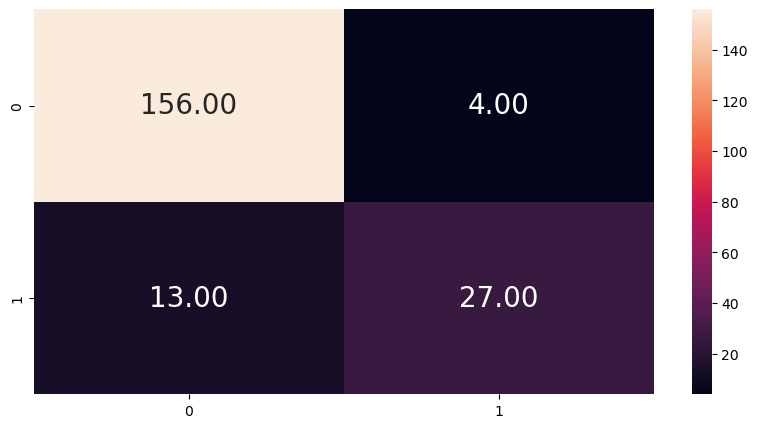

In [70]:
# plot the confusion matrix
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

In [71]:
# print the auc score of the model
print(f'Here is the auc score of the model {roc_auc_score(y_test,y_pred)}')

Here is the auc score of the model 0.825


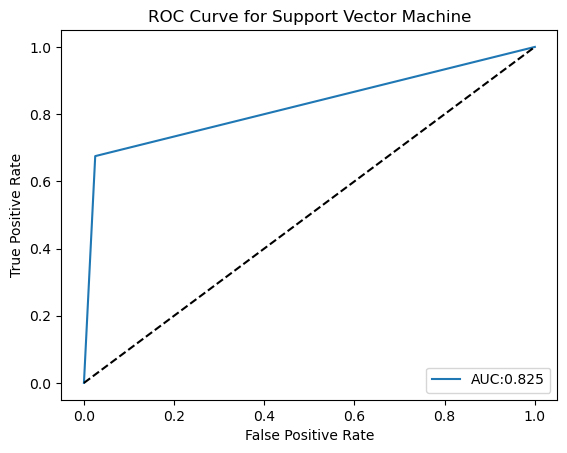

In [72]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

DECISION TREE


In [73]:
Classifier_dt = DecisionTreeClassifier(ccp_alpha=0.11,max_depth=None, min_samples_split=2, random_state=0)
Classifier_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.11, random_state=0)

In [74]:
y_preds = Classifier_dt.predict(x_test)
acc_dt = accuracy_score(y_preds,y_test)
acc_dt

0.895

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
# print the classification report
print(f'Here is the classification report of the model \n \n {classification_report(y_test,y_preds)}')

Here is the classification report of the model 
 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       160
           1       0.71      0.80      0.75        40

    accuracy                           0.90       200
   macro avg       0.83      0.86      0.84       200
weighted avg       0.90      0.90      0.90       200



In [77]:
# print the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_preds)}')

Here is the confusion matrix of the model 
 
 [[147  13]
 [  8  32]]


<Axes: >

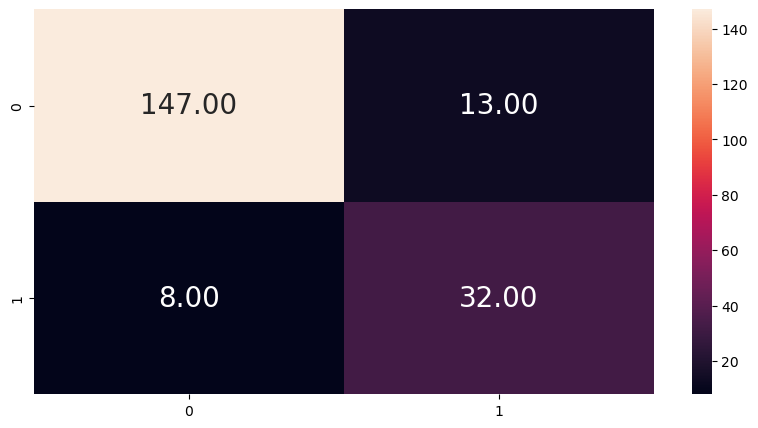

In [78]:
# plot the confusion matrix
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,fmt='0.2f',annot_kws={'size':20})

In [79]:
# print the auc score of the model
print(f'Here is the auc score of the model {roc_auc_score(y_test,y_preds)}')

Here is the auc score of the model 0.859375


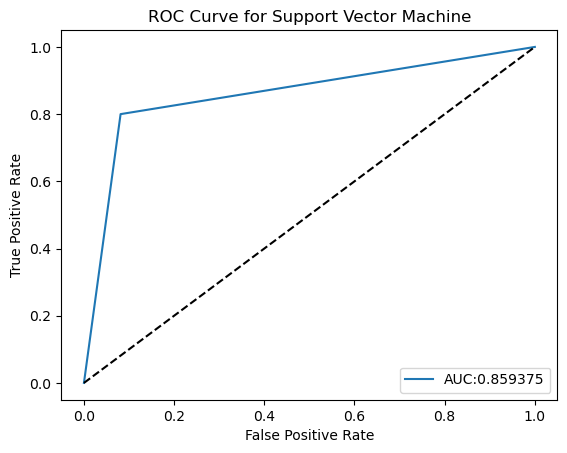

In [80]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_preds)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_preds)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

ADABOOST CLASIFIER

In [81]:
Classifier_ab = AdaBoostClassifier()
Classifier_ab.fit(x_train[:100],y_train[:100])

AdaBoostClassifier()

In [82]:
y_pred1 = Classifier_ab.predict(x_test)
acc_ab = accuracy_score(y_pred1,y_test)
acc_ab

0.925

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
# print the classification report
print(f'Here is the classification report of the model \n \n {classification_report(y_test,y_preds)}')

Here is the classification report of the model 
 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       160
           1       0.71      0.80      0.75        40

    accuracy                           0.90       200
   macro avg       0.83      0.86      0.84       200
weighted avg       0.90      0.90      0.90       200



In [85]:
# print the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_preds)}')

Here is the confusion matrix of the model 
 
 [[147  13]
 [  8  32]]


<Axes: >

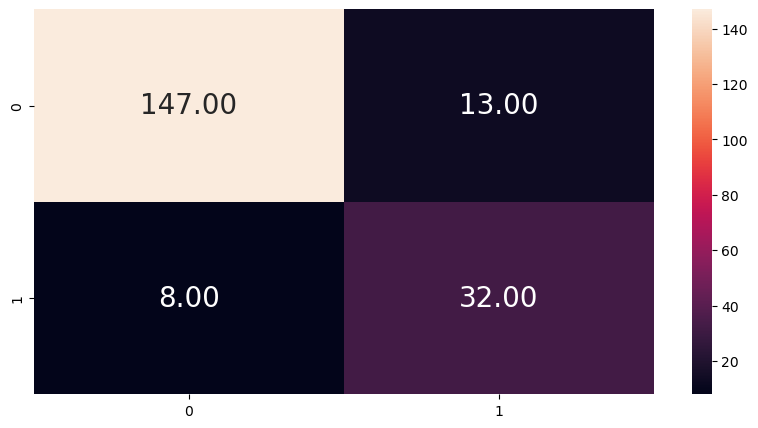

In [86]:
# plot the confusion matrix
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,fmt='0.2f',annot_kws={'size':20})

In [87]:

# print the auc score of the model
print(f'Here is the auc score of the model {roc_auc_score(y_test,y_preds)}')

Here is the auc score of the model 0.859375


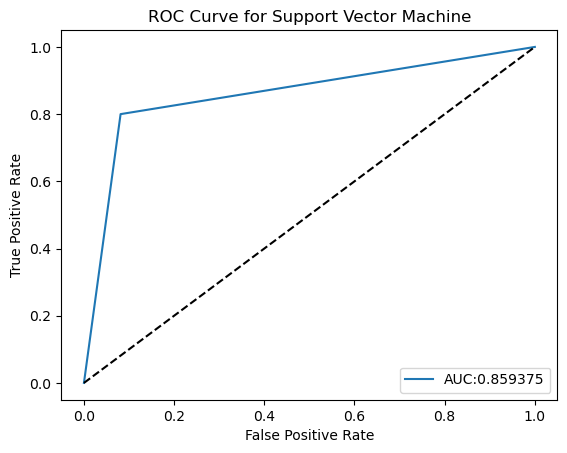

In [88]:

# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_preds)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_preds)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

ANN

In [89]:
!pip install tensorflow


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

In [91]:
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [92]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [93]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
history=model.fit(x_train, y_train, batch_size=500, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 574ms/step - accuracy: 0.2052 - loss: 0.6167 - val_accuracy: 0.2000 - val_loss: 0.5965
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.2038 - loss: 0.6023 - val_accuracy: 0.2000 - val_loss: 0.5798
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1992 - loss: 0.5839 - val_accuracy: 0.2000 - val_loss: 0.5646
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.1985 - loss: 0.5699 - val_accuracy: 0.2000 - val_loss: 0.5508
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.2052 - loss: 0.5577 - val_accuracy: 0.2000 - val_loss: 0.5380
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.2045 - loss: 0.5406 - val_accuracy: 0.2000 - val_loss: 0.5263
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.2098 - loss: 0.5350 - val_accuracy: 0.2000 - val_loss: 0.5154
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.2012 - loss: 0.5180 - val_accuracy: 0.2000 - val_loss:

In [95]:
abc=model.predict(x_test)
abc = (abc > 0.5).astype(int) # Convert predictions to binary class labels
acc_ann =accuracy_score(abc,y_test)
print(acc_ann)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0.2


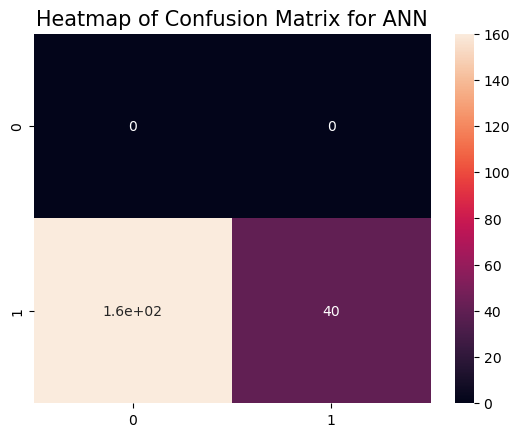

In [96]:
#confustion metrix
cm = confusion_matrix(abc,y_test)
plt.title('Heatmap of Confusion Matrix for ANN', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

GUASSIAN NB

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [98]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Predictions
y_pred = gnb.predict(x_test)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_test, y_pred)
accuracy_binary = 1 if accuracy_gnb > 0.5 else 0
print(f'Gaussian Naive Bayes Accuracy: {accuracy_gnb:.2f}')

Gaussian Naive Bayes Accuracy: 0.89


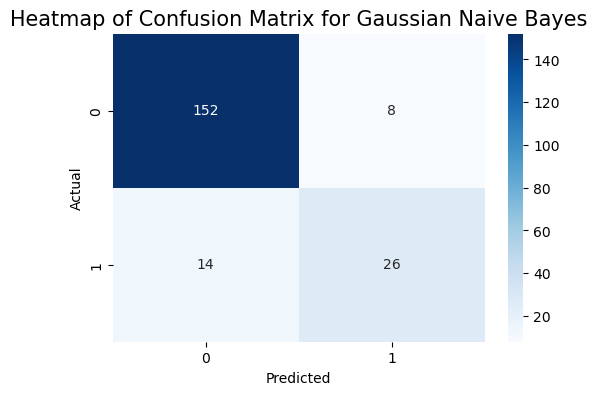

In [99]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.title('Heatmap of Confusion Matrix for Gaussian Naive Bayes', fontsize=15)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Extra Trees Classifier Accuracy: 0.92 


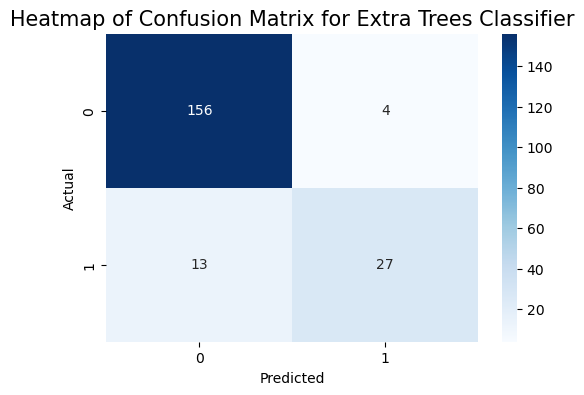

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Extra Trees Classifier model
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(x_train, y_train)

# Predictions
y_pred = etc.predict(x_test)

# Calculate accuracy
accuracy_etc = accuracy_score(y_test, y_pred)
accuracy_binary = 1 if accuracy_etc > 0.5 else 0
print(f'Extra Trees Classifier Accuracy: {accuracy_etc:.2f} ')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.title('Heatmap of Confusion Matrix for Extra Trees Classifier', fontsize=15)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

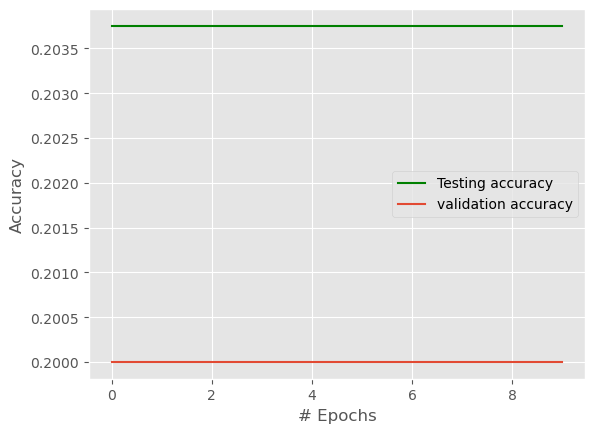

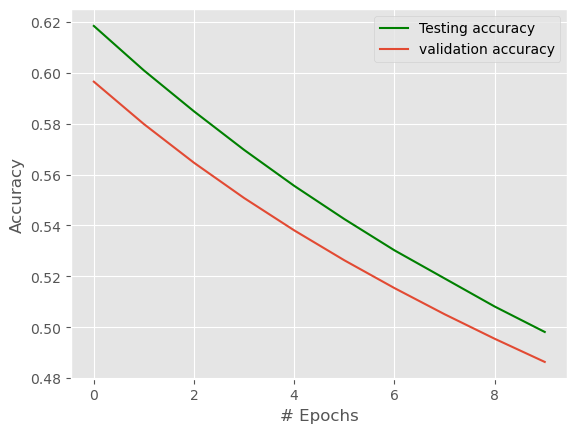

0.20374999940395355


In [101]:
 # Plotting Graphs for accuracy and Losses
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig("models/inception_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Testing accuracy',color='green')
plt.plot(history.history['val_loss'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig("models/inception_loss.png")
plt.show()


acc=history.history['accuracy'][-1]
print(acc)

ACCURACY GRAPH

In [102]:
graph = pd.DataFrame({'Models':['KMeans','XGBClassifier','RandomForestClassifier','DecisionTreeClassifier','AdaBoostClassifier','ANN','GaussianNB','ExtraTreesClassifier'],
                      'Accuracy':[acc_km*100, acc_xgb*100, acc_rf*100, acc_dt*100, acc_ab*100, acc_ann*100, accuracy_gnb*100, accuracy_etc*100]})
print(graph)

                   Models   Accuracy
0                  KMeans  31.543624
1           XGBClassifier  92.500000
2  RandomForestClassifier  91.500000
3  DecisionTreeClassifier  89.500000
4      AdaBoostClassifier  92.500000
5                     ANN  20.000000
6              GaussianNB  89.000000
7    ExtraTreesClassifier  91.500000


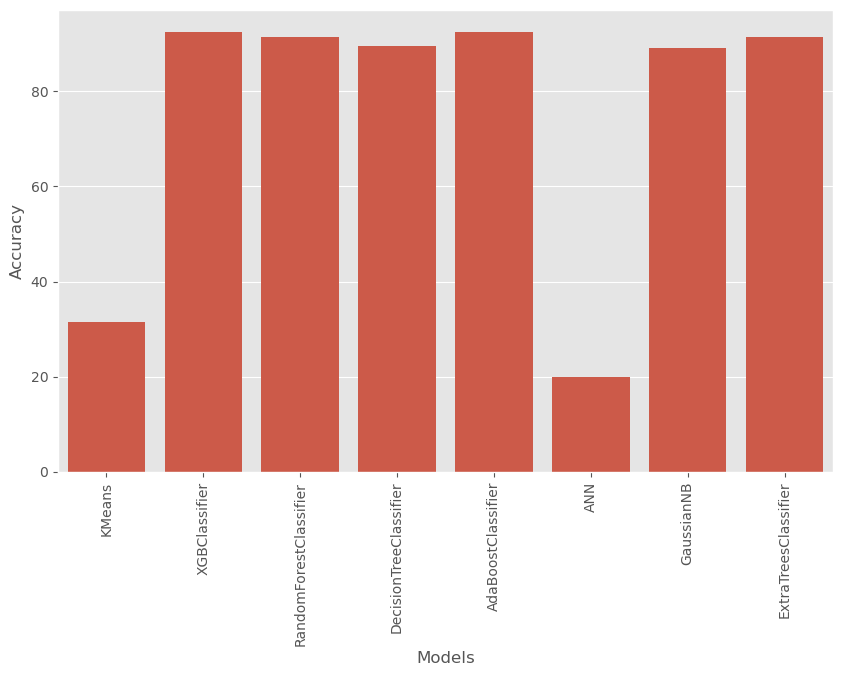

In [103]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph.Accuracy,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()

APPLYING K-BEST FEATURE SELECTION METHOD


In [104]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.02522778, 0.05596964, 0.0050505 , 0.00264369, 0.        ,
       0.        , 0.01146301, 0.        , 0.0184978 , 0.26891986,
       0.00827446, 0.        , 0.01426816, 0.        ])

In [105]:
data = pd.read_excel(r'Autism child data.xlsx')

In [106]:
data = data[data['age']!='?']

In [107]:
le = LabelEncoder()
data['gender']= le.fit_transform(data['gender'])
data['ethnicity']= le.fit_transform(data['ethnicity'])
data['jundice']= le.fit_transform(data['jundice'])
data['austim']= le.fit_transform(data['austim'])
data['contry_of_res']= le.fit_transform(data['contry_of_res'])
data['used_app_before']= le.fit_transform(data['used_app_before'])
data['age_desc']= le.fit_transform(data['age_desc'])
data['relation']= le.fit_transform(data['relation'])
data['Class/ASD']= le.fit_transform(data['Class/ASD'])

In [108]:
a = data.drop(['Class/ASD'],axis=1)
b = data['Class/ASD']

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state= 42)

In [110]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(a_train, b_train)
mutual_info

array([0.0656445 , 0.10263291, 0.06679744, 0.18690487, 0.0837338 ,
       0.12866436, 0.02056188, 0.11327971, 0.16019819, 0.06191999,
       0.        , 0.02041384, 0.00796202, 0.05557847, 0.        ,
       0.13579671, 0.00414139, 0.69388824, 0.00672012, 0.        ])

In [111]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = a_train.columns
mutual_info.sort_values(ascending=False)

result             0.693888
A4_Score           0.186905
A9_Score           0.160198
contry_of_res      0.135797
A6_Score           0.128664
A8_Score           0.113280
A2_Score           0.102633
A5_Score           0.083734
A3_Score           0.066797
A1_Score           0.065644
A10_Score          0.061920
jundice            0.055578
A7_Score           0.020562
gender             0.020414
ethnicity          0.007962
age_desc           0.006720
used_app_before    0.004141
age                0.000000
austim             0.000000
relation           0.000000
dtype: float64

In [112]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = a_train.columns
mutual_info.sort_values(ascending=False)

result             0.693888
A4_Score           0.186905
A9_Score           0.160198
contry_of_res      0.135797
A6_Score           0.128664
A8_Score           0.113280
A2_Score           0.102633
A5_Score           0.083734
A3_Score           0.066797
A1_Score           0.065644
A10_Score          0.061920
jundice            0.055578
A7_Score           0.020562
gender             0.020414
ethnicity          0.007962
age_desc           0.006720
used_app_before    0.004141
age                0.000000
austim             0.000000
relation           0.000000
dtype: float64

In [113]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(a_train, b_train)
a_train.columns[sel_five_cols.get_support()]

Index(['A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A8_Score',
       'A9_Score', 'A10_Score', 'contry_of_res', 'result'],
      dtype='object')

In [114]:
# Define the list of columns you want to select
columns_to_select = ['A1_Score', 'A3_Score', 'A4_Score', 'A6_Score', 'A7_Score', 'A8_Score',
       'A9_Score', 'A10_Score', 'contry_of_res', 'result','Class/ASD']
# Create a new DataFrame with the selected columns
data1 = data[columns_to_select].copy()
data1.head()

A1_Score  A3_Score  A4_Score  A6_Score  A7_Score  A8_Score  A9_Score  \
0         1         0         0         1         0         1         0   
1         1         0         0         1         0         1         0   
2         1         1         1         1         1         1         1   
3         1         1         1         1         0         1         0   
4         1         1         1         1         1         1         0   

   A10_Score  contry_of_res  result  Class/ASD  
0          0             23       5          0  
1          0             23       5          0  
2          1             45      10          1  
3          1             44       7          1  
4          0              5       8          1

In [115]:
data1.tail()

A1_Score  A3_Score  A4_Score  A6_Score  A7_Score  A8_Score  A9_Score  \
493         1         1         1         1         1         1         1   
494         1         0         0         0         1         0         0   
495         1         1         1         1         1         0         0   
496         1         1         0         1         1         1         1   
497         0         1         0         0         1         0         0   

     A10_Score  contry_of_res  result  Class/ASD  
493          1             44      10          1  
494          1              3       4          0  
495          1              8       7          1  
496          1             17       9          1  
497          0             17       3          0

Kmeans

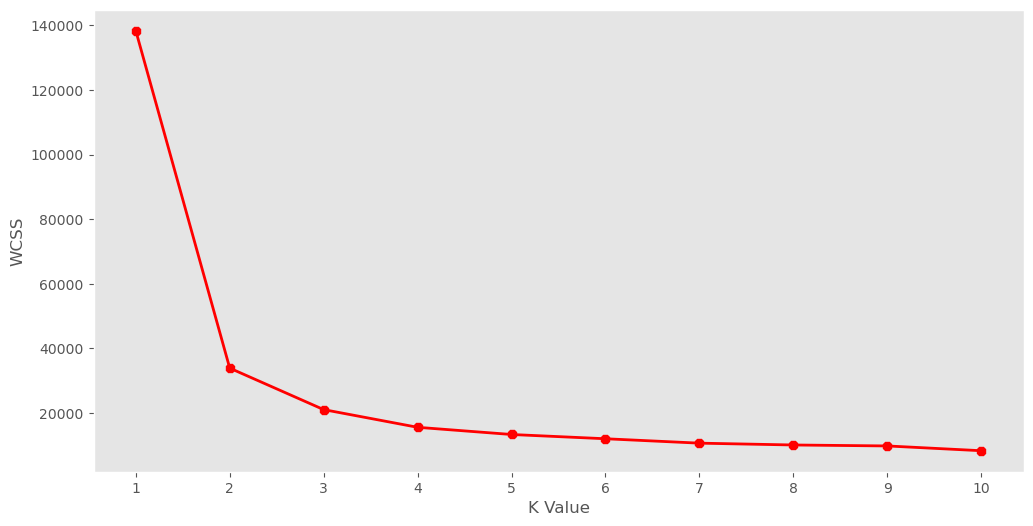

In [116]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [117]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["Class/ASD"] = clusters
kms = KMeans(n_clusters=5)
kms.fit(a_train)

KMeans(n_clusters=5)

In [118]:
pred = kms.predict(a_test)
acc_km1 = accuracy_score(pred,b_test)
acc_km1

0.12080536912751678

XGB

In [119]:
a, b = make_classification(
    n_samples=1000, n_features=14, n_informative=2, n_redundant=0, n_classes=2,
    weights=[0.8, 0.2], random_state=42
)
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)
a_train

array([[-0.61764168, -0.88227092, -1.19678865, ...,  0.71232216,
         2.28165184, -1.88001003],
       [-0.81578773,  0.93587754, -1.54459973, ...,  0.63190034,
        -0.9044005 , -1.70734295],
       [-1.85933677, -1.0454409 ,  0.49406392, ..., -0.53804776,
         0.79784378,  0.55833642],
       ...,
       [ 0.80857101, -2.19556389, -0.55879582, ...,  0.46107803,
         0.25062823, -0.77420382],
       [-0.0862171 ,  0.73348372,  0.83016137, ..., -0.95304046,
         1.0781254 , -1.53653069],
       [-0.05739537, -0.91231877, -0.15011695, ...,  0.73918049,
         0.50702027, -0.70791094]])

In [120]:
b_train

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [121]:
from xgboost import XGBClassifier

In [122]:
xgb = XGBClassifier( n_estimators=100, n_jobs=None)
xgb.fit(a_train,b_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
ypred = xgb.predict(a_test)
acc_xgb1 = accuracy_score(ypred,b_test)
acc_xgb1

0.925

Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.datasets import make_classification
n_estimators =10
Classifier_rf = RandomForestClassifier(random_state=42,n_estimators=n_estimators)
Classifier_rf.fit(a_train,b_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [125]:
b_pred = Classifier_rf.predict(a_test)
acc_rf1 = accuracy_score(b_pred,b_test)
acc_rf1

0.915

In [126]:
from sklearn.metrics import classification_report,confusion_matrix
# print the classification report
print(f'Here is the classification report of the model \n \n {classification_report(y_test,y_pred)}')

Here is the classification report of the model 
 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       160
           1       0.87      0.68      0.76        40

    accuracy                           0.92       200
   macro avg       0.90      0.82      0.85       200
weighted avg       0.91      0.92      0.91       200



In [127]:
# print the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

Here is the confusion matrix of the model 
 
 [[156   4]
 [ 13  27]]


<Axes: >

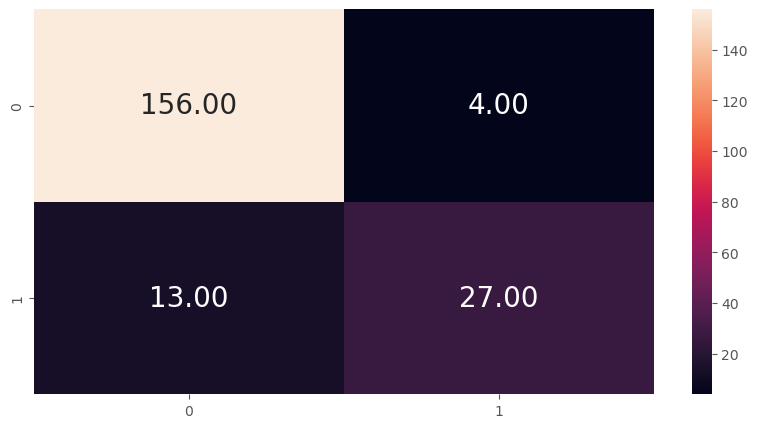

In [128]:
# plot the confusion matrix
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

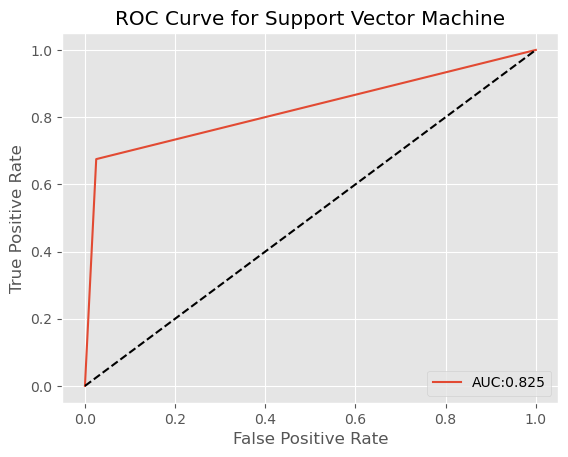

In [129]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_pred)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

Decision Tree


In [130]:
Classifier_dt = DecisionTreeClassifier(ccp_alpha=0.11,max_depth=None, min_samples_split=2, random_state=0)
Classifier_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.11, random_state=0)

In [131]:
y_preds = Classifier_dt.predict(x_test)
acc_dt1 = accuracy_score(y_preds,y_test)
acc_dt1

0.895

In [132]:
from sklearn.metrics import classification_report,confusion_matrix

In [133]:
# print the classification report
print(f'Here is the classification report of the model \n \n {classification_report(y_test,y_preds)}')

Here is the classification report of the model 
 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       160
           1       0.71      0.80      0.75        40

    accuracy                           0.90       200
   macro avg       0.83      0.86      0.84       200
weighted avg       0.90      0.90      0.90       200



In [134]:
# print the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_preds)}')

Here is the confusion matrix of the model 
 
 [[147  13]
 [  8  32]]


<Axes: >

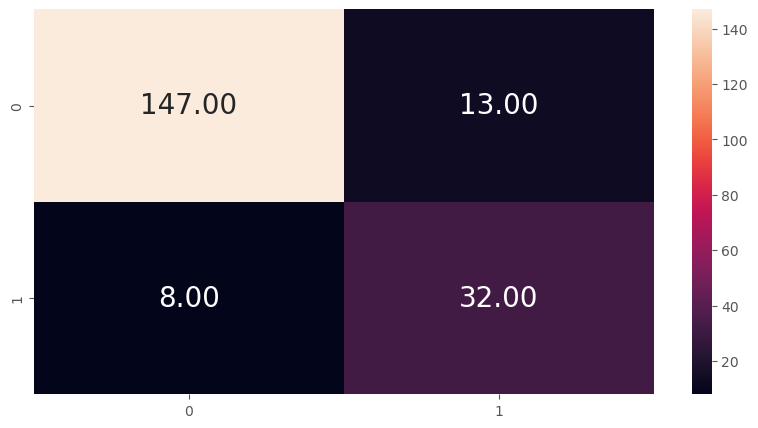

In [135]:
# plot the confusion matrix
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,fmt='0.2f',annot_kws={'size':20})

In [136]:
# print the auc score of the model
print(f'Here is the auc score of the model {roc_auc_score(y_test,y_preds)}')

Here is the auc score of the model 0.859375


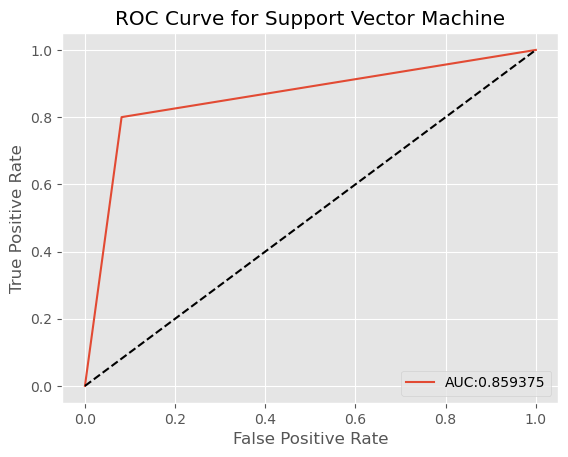

In [137]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_preds)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_preds)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

ADABOOST

In [138]:
Classifier_ab = AdaBoostClassifier()
Classifier_ab.fit(x_train,y_train)

AdaBoostClassifier()

In [139]:
y_pred1 = Classifier_ab.predict(x_test)
acc_ab1 = accuracy_score(y_pred1,y_test)
acc_ab1

0.93

In [140]:
from sklearn.metrics import classification_report,confusion_matrix
# print the classification report
print(f'Here is the classification report of the model \n \n {classification_report(y_test,y_preds)}')

Here is the classification report of the model 
 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       160
           1       0.71      0.80      0.75        40

    accuracy                           0.90       200
   macro avg       0.83      0.86      0.84       200
weighted avg       0.90      0.90      0.90       200



In [141]:
# print the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_preds)}')

Here is the confusion matrix of the model 
 
 [[147  13]
 [  8  32]]


<Axes: >

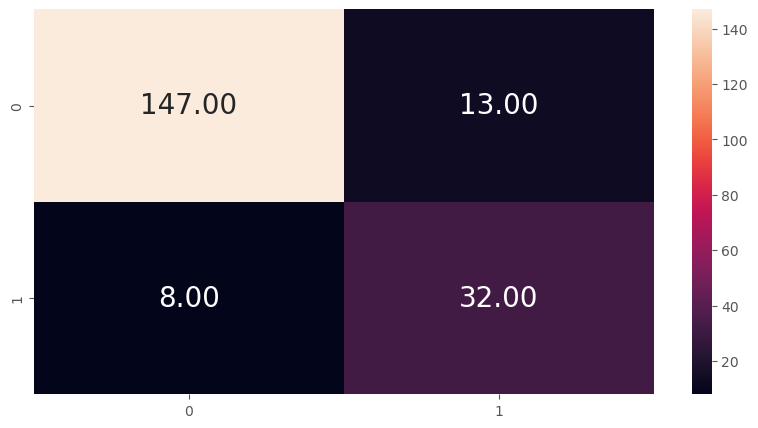

In [142]:
# plot the confusion matrix
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,fmt='0.2f',annot_kws={'size':20})

In [143]:
# print the auc score of the model
print(f'Here is the auc score of the model {roc_auc_score(y_test,y_preds)}')

Here is the auc score of the model 0.859375


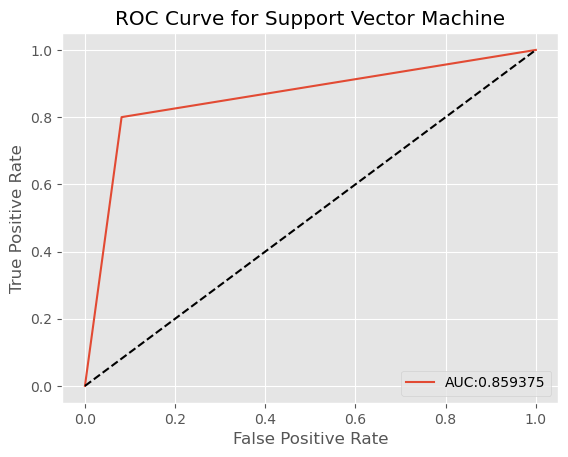

In [144]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,y_preds)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,y_preds)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

ANN

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
a_train = tf.convert_to_tensor(a_train, dtype=tf.float32)
b_train = tf.convert_to_tensor(b_train, dtype=tf.float32)
a_test = tf.convert_to_tensor(a_test, dtype=tf.float32)
b_test = tf.convert_to_tensor(b_test, dtype=tf.float32)

In [146]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [147]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, batch_size=500, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 554ms/step - accuracy: 0.7155 - loss: 0.6081 - val_accuracy: 0.7450 - val_loss: 0.5964
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7378 - loss: 0.5903 - val_accuracy: 0.7800 - val_loss: 0.5810
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7487 - loss: 0.5798 - val_accuracy: 0.7850 - val_loss: 0.5669
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7728 - loss: 0.5610 - val_accuracy: 0.7900 - val_loss: 0.5538
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.7828 - loss: 0.5495 - val_accuracy: 0.7850 - val_loss: 0.5416
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.7867 - loss: 0.5362 - val_accuracy: 0.8000 - val_loss: 0.5304
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.7933 - loss: 0.5280 - val_accuracy: 0.8000 - val_loss: 0.5201
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.8008 - loss: 0.5142 - val_accuracy: 0.8050 - val_loss:

In [148]:
abc=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [149]:
abc = (abc > 0.5).astype(int) # Convert predictions to binary class labels
acc_ann1 =accuracy_score(abc,b_test)
print(acc_ann1)

0.81


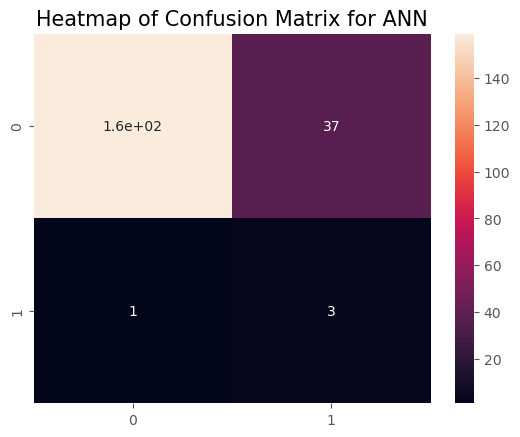

In [150]:

#confustion metrix
cm = confusion_matrix(abc,b_test)
plt.title('Heatmap of Confusion Matrix for ANN', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

Guassian NB and Extra Tree

Gaussian Naive Bayes Accuracy: 0.89 


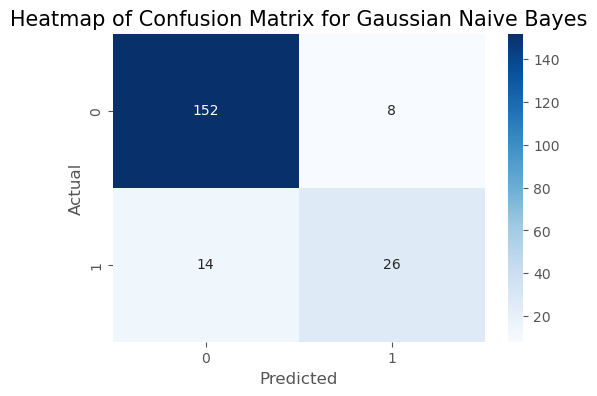

In [151]:
gnb1 = GaussianNB()
gnb1.fit(a_train, b_train)
b_pred_gnb = gnb1.predict(a_test)

# Calculate accuracy
accuracy_gnb1 = accuracy_score(b_test, b_pred_gnb)

accuracy_binary_gnb1 = 1 if accuracy_gnb1 > 0.5 else 0
print(f'Gaussian Naive Bayes Accuracy: {accuracy_gnb1:.2f} ')

# Confusion Matrix for Gaussian Naive Bayes
cm_gnb1 = confusion_matrix(b_test, b_pred_gnb)
plt.figure(figsize=(6,4))
plt.title('Heatmap of Confusion Matrix for Gaussian Naive Bayes', fontsize=15)
sns.heatmap(cm_gnb1, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Extra Trees Classifier Accuracy: 0.92 


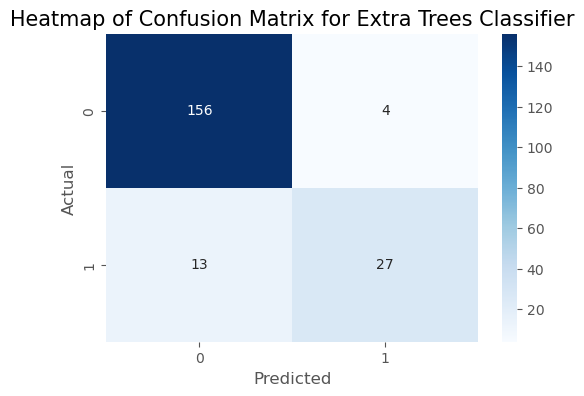

In [152]:
etc1 = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc1.fit(a_train, b_train)
b_pred_etc = etc1.predict(a_test)
accuracy_etc1 = accuracy_score(b_test, b_pred_etc)
accuracy_binary_etc1 = 1 if accuracy_etc1 > 0.5 else 0
print(f'Extra Trees Classifier Accuracy: {accuracy_etc1:.2f} ')
#Confusion Matrix for Extra Trees Classifier
cm_etc1 = confusion_matrix(b_test, b_pred_etc)
plt.figure(figsize=(6,4))
plt.title('Heatmap of Confusion Matrix for Extra Trees Classifier', fontsize=15)
sns.heatmap(cm_etc1, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [153]:
# Accuracy Comparison Graph
graph1 = pd.DataFrame({'Models':['KMeans','XGBClassifier','RandomForestClassifier','DecisionTreeClassifier','AdaBoostClassifier','ANN','GaussianNB','ExtraTreesClassifier'],
                      'Accuracy':[acc_km*100, acc_xgb*100, acc_rf*100, acc_dt*100, acc_ab*100, acc_ann1*100, accuracy_gnb1*100, accuracy_etc1*100]})
print(graph1)


                   Models   Accuracy
0                  KMeans  31.543624
1           XGBClassifier  92.500000
2  RandomForestClassifier  91.500000
3  DecisionTreeClassifier  89.500000
4      AdaBoostClassifier  92.500000
5                     ANN  81.000000
6              GaussianNB  89.000000
7    ExtraTreesClassifier  91.500000


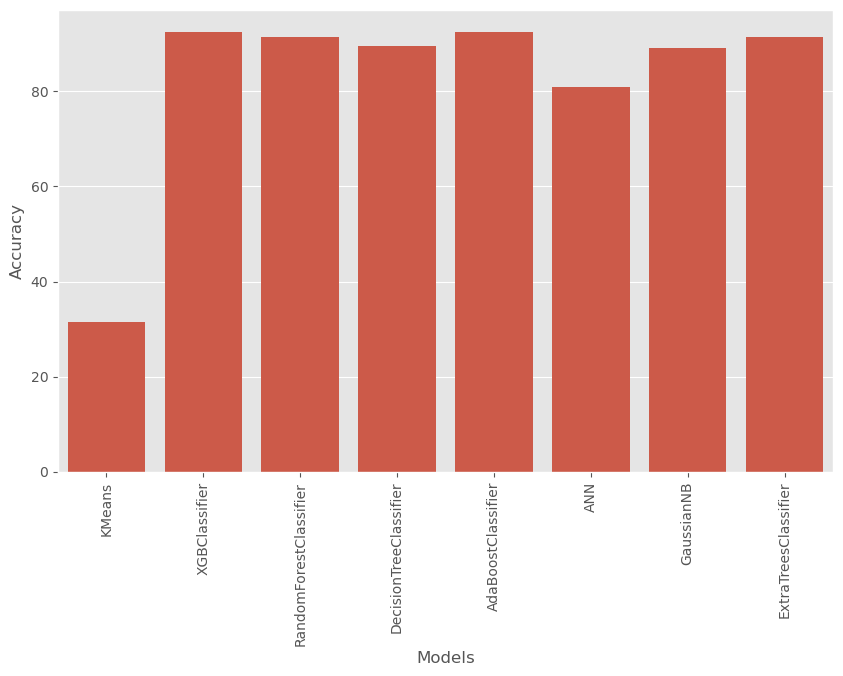

In [154]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph1.Accuracy,x = graph1.Models)
plt.xticks(rotation = 'vertical')
plt.show()

In [155]:
data[data['Class/ASD']==1]

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
2           1         1         1         1         1         1         1   
3           1         0         1         1         1         1         0   
4           1         1         1         1         1         1         1   
5           1         1         1         1         1         1         1   
6           1         0         0         0         1         1         1   
..        ...       ...       ...       ...       ...       ...       ...   
491         0         1         0         1         1         1         1   
492         0         1         1         1         1         1         1   
493         1         1         1         1         1         1         1   
495         1         0         1         1         1         1         1   
496         1         1         1         0         1         1         1   

     A8_Score  A9_Score  A10_Score  ... gender  ethnicity  jundice  austim  \
2           1         1          1  ...      1          5        1       0   
3           1         0          1  ...      1          9        0       0   
4           1         0          0  ...      0          4        0       0   
5           0         0          0  ...      0          4        0       0   
6           1         1          1  ...      1          9        1       0   
..        ...       ...        ...  ...    ...        ...      ...     ...   
491         1         1          1  ...      0          9        0       0   
492         1         1          1  ...      0          3        1       0   
493         1         1          1  ...      0          9        1       1   
495         0         0          1  ...      1          3        0       0   
496         1         1          1  ...      1          7        0       0   

     contry_of_res  used_app_before  result  age_desc  relation  Class/ASD  
2               45                0      10         0         1          1  
3               44                0       7         0         1          1  
4                5                0       8         0         1          1  
5                5                0       7         0         1          1  
6               44                0       7         0         3          1  
..             ...              ...     ...       ...       ...        ...  
491              3                0       8         0         0          1  
492              7                0       9         0         1          1  
493             44                0      10         0         1          1  
495              8                0       7         0         1          1  
496             17                0       9         0         1          1  

[252 rows x 21 columns]

In [156]:
x_train

array([[-0.61764168, -0.88227092, -1.19678865, ...,  0.71232216,
         2.28165184, -1.88001003],
       [-0.81578773,  0.93587754, -1.54459973, ...,  0.63190034,
        -0.9044005 , -1.70734295],
       [-1.85933677, -1.0454409 ,  0.49406392, ..., -0.53804776,
         0.79784378,  0.55833642],
       ...,
       [ 0.80857101, -2.19556389, -0.55879582, ...,  0.46107803,
         0.25062823, -0.77420382],
       [-0.0862171 ,  0.73348372,  0.83016137, ..., -0.95304046,
         1.0781254 , -1.53653069],
       [-0.05739537, -0.91231877, -0.15011695, ...,  0.73918049,
         0.50702027, -0.70791094]])

PREDICTION


In [157]:
abc=[5,1,45,10,1,1,1,1,1,1,1,1 ,1,1]
result=Classifier_rf.predict([abc])
result=result[0]
if result==0:
    print("The prediction result is the Normal")
elif result==1:
    print("The prediction result is the AUTISM SPECTRUM DISORDER")


The prediction result is the AUTISM SPECTRUM DISORDER


COMPARISION GRAPH

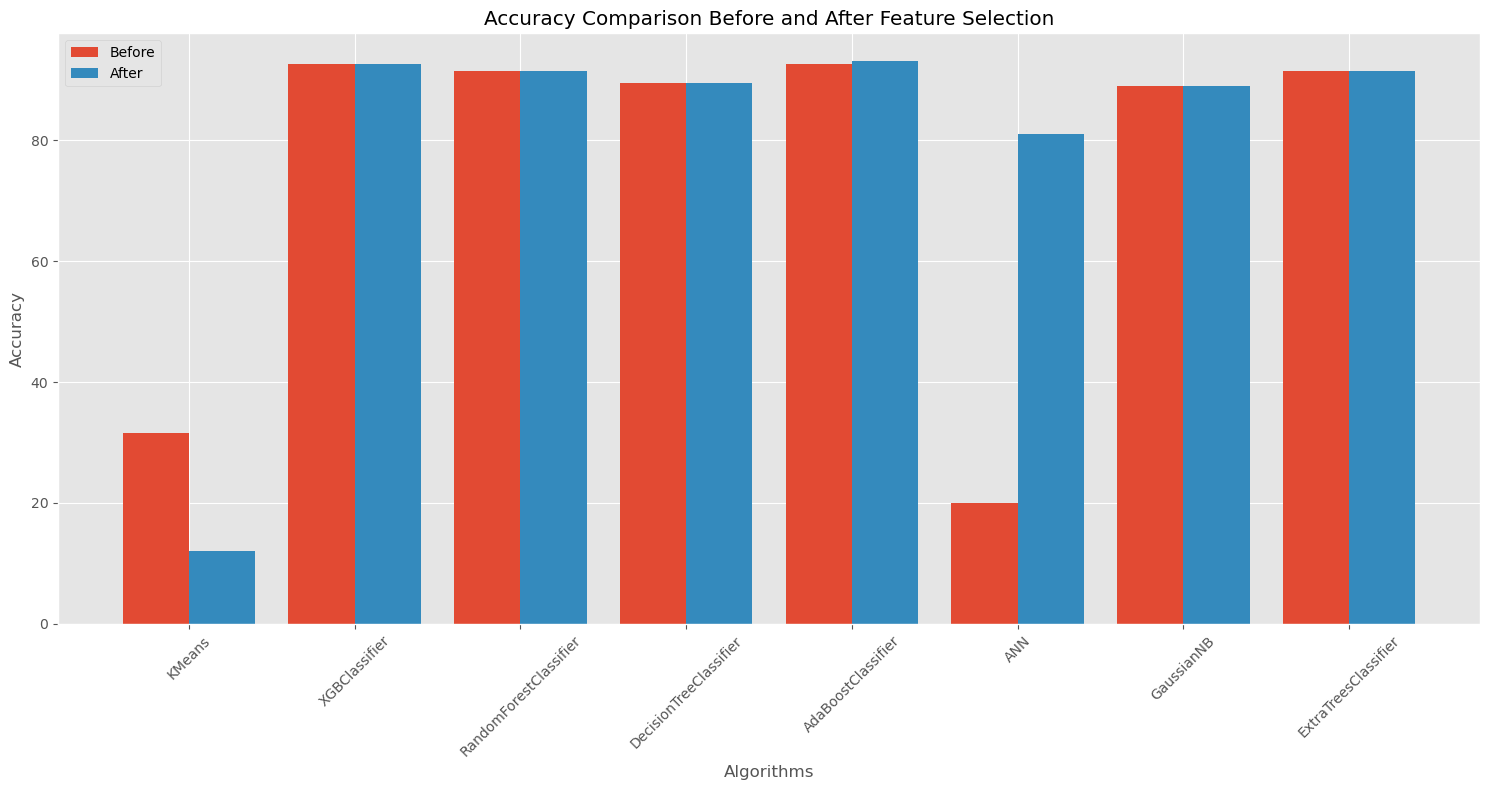

In [158]:
# Accuracy Comparison Graph
models = ['KMeans','XGBClassifier','RandomForestClassifier','DecisionTreeClassifier','AdaBoostClassifier','ANN','GaussianNB','ExtraTreesClassifier']
accuracy_before = [acc_km*100, acc_xgb*100, acc_rf*100, acc_dt*100, acc_ab*100, acc_ann*100, accuracy_gnb*100, accuracy_etc*100]
accuracy_after = [acc_km1*100, acc_xgb1*100, acc_rf1*100, acc_dt1*100, acc_ab1*100, acc_ann1*100, accuracy_gnb1*100, accuracy_etc1*100]

# Set the positions of the bars on the x-axis
positions = np.arange(len(models))

# Plot the bar graph
plt.figure(figsize=(15, 8))
plt.bar(positions - 0.2, accuracy_before, width=0.4, label='Before')
plt.bar(positions + 0.2, accuracy_after, width=0.4, label='After')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Before and After Feature Selection')
plt.xticks(positions, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()